##   <center> Business Overview </center>

<center><img src="Logo.png"/></center>
Fire Maul Tools is a firefighter-owned company serving firefighters, tactical teams, and military personnel worldwide by providing innovative tools that were designed for what they do. The company started by producing handmade firefighting tools such as axes and halligan bars, but since then has expanded their product breadth to include items such as tool lube and grip kits. The grip kits are just what they sound like, it is a fiber tape that comes with a lacing ring system that greatly improves grip on the tools. The item has proved to be very popular and the business owner wants to make sure he is getting the most out of the product while keeping his cost down. That is why Fire Maul Tools has tasked me with forecasting the future demand of the grip kits. This way the company can plan its purchasing and inventory levels more effeciently which will lead to lower costs associated with excessive inventory or stockouts. The business owner has stated that since he is a start-up small business his shop is relatively small and does not have a lot of room to inventory the grip kit materials which are shipped to him by the box on pallets. In the past he has been short on supplies when orders come in, but can not afford to take up excess space by over stocking. By following the Data Science methodology and utilizing time-series machine learning techniques, I plan to accomplish solve this problem and help Fire Maul Tools grow as a company so that they can continue to serve First Responders.

**** 

## <center> Data Understanding </center>
 To complete this task, I have been given a dataset with the needed information that will be used with our models. Again, the standard Data Science methodology will be followed:
 -  Obtain the Data
 -  Clean the Data
 -  Exploration
 -  Model
 -  Interpret

We will now begin by importing the data and python libraries we will need in the project. Following that we will take an initial glance at the dataset to see what it contains and what format it is in. We will also need to address things like missing values and unnecessary columns. The idea is that after performing these cleaning steps, we will have a better understanding of the information in the table and that will lead to creating better model outputs.


In [3]:
# Importing libraries 

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#importing libraries to read the files
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from time import gmtime, strftime 
from pylab import rcParams

#importing libraries to be used in model building
import statsmodels.api as sm
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose 

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook
from itertools import product

%matplotlib inline


# Importing dataset
df = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/capstone/Wraps.csv')




In [4]:
# Taking a look at the first few rows...
df.head()

,Unnamed: 0,Date,Transaction Type,Num,Customer,Memo/Description,Qty,Sales Price,Amount,Balance
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,#1394,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,#1477,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,49.90
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,#1511,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,74.85
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,#1617,NaN,FireWrap Grip Kit,1.0,34.95,34.95,109.80


In [5]:
# Checking the columns, Dtype, and number of rows..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5799 non-null   object 
 1   Date              5761 non-null   object 
 2   Transaction Type  5761 non-null   object 
 3   Num               5761 non-null   object 
 4   Customer          0 non-null      float64
 5   Memo/Description  5558 non-null   object 
 6   Qty               5780 non-null   float64
 7   Sales Price       5747 non-null   float64
 8   Amount            5780 non-null   object 
 9   Balance           5761 non-null   object 
dtypes: float64(3), object(7)
memory usage: 453.3+ KB


***
So We see 10 columns with varying null counts and Dtypes. Many of these columns seem self-explanatory but others not as much. We will take a look into some of these columns and see what we can learn, starting with 'Unnamed: 0'.
****

In [6]:
# Unnamed: 0


# Lets see what the rows of this column contains...
df['Unnamed: 0'].unique()

array(['FireWrap Grip Kit - Light Blue',
       'Total for FireWrap Grip Kit - Light Blue',
       'FireWrap Grip Kit - Pink', 'Total for FireWrap Grip Kit - Pink',
       'FireWrap® Grip Kit Black', 'Total for FireWrap® Grip Kit Black',
       'FireWrap® Grip Kit Blue', 'Total for FireWrap® Grip Kit Blue',
       'FireWrap® Grip Kit GLOW - Aqua',
       'Total for FireWrap® Grip Kit GLOW - Aqua',
       'FireWrap® Grip Kit GLOW - Green ( 927 )',
       'Total for FireWrap® Grip Kit GLOW - Green ( 927 )',
       'FireWrap® Grip Kit Orange', 'Total for FireWrap® Grip Kit Orange',
       'FireWrap® Grip Kit Red', 'Total for FireWrap® Grip Kit Red',
       'FireWrap® Grip Kit Yellow', 'Total for FireWrap® Grip Kit Yellow',
       'FireWrap® Grip Kit Green', 'Total for FireWrap® Grip Kit Green',
       'FireWrap® Grip Kit White', 'Total for FireWrap® Grip Kit White',
       'TOTAL', nan,
       'Wednesday, Jan 11, 2023 10:03:05 AM GMT-8 - Accrual Basis'],
      dtype=object)

In [7]:
# Count for each item under this column
df['Unnamed: 0'].value_counts()

FireWrap® Grip Kit Black                                     1622
FireWrap® Grip Kit Red                                       1272
FireWrap® Grip Kit Blue                                       631
FireWrap® Grip Kit Orange                                     517
FireWrap® Grip Kit GLOW - Green ( 927 )                       479
FireWrap® Grip Kit GLOW - Aqua                                432
FireWrap® Grip Kit Yellow                                     332
FireWrap® Grip Kit Green                                      323
FireWrap® Grip Kit White                                      145
FireWrap Grip Kit - Light Blue                                 16
FireWrap Grip Kit - Pink                                       10
Total for FireWrap® Grip Kit Blue                               2
Total for FireWrap® Grip Kit Red                                2
Total for FireWrap® Grip Kit GLOW - Aqua                        2
Total for FireWrap® Grip Kit Orange                             2
Total for 

In [8]:
print('Total Units Sold =',df['Qty'].sum())
print('***********')
print('***********')


print(df['Qty'].describe())

Total Units Sold = 41931.0
***********
***********
count     5780.000000
mean         7.254498
std        194.372165
min         -5.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      13977.000000
Name: Qty, dtype: float64




<br></br>
***
The 'Unnamed' column primarily looks like the different options of colors for the grip kits, but when it was entered into their accounting system the 'Total' for each option was put in the same column. This will be addressed later.

To get a better understanding of the products and units sold I printed some information off in the previous cell. But again this number will change as you clean the dataframe and remove the 'Total' rows.
***

#### Date

In [9]:
# Date


# Number of rows with different dates...
df['Date'].nunique()

1467

In [10]:
# Date
# Total number of different dates, with the most frequent date..
df['Date'].describe()

count           5761
unique          1467
top       03/27/2021
freq              48
Name: Date, dtype: object

In [11]:
# Glance at different value counts per each date...
df['Date'].value_counts()

03/27/2021    48
04/27/2018    39
05/03/2022    36
01/19/2021    33
04/26/2018    33
              ..
03/13/2022     1
12/24/2020     1
07/19/2020     1
07/12/2020     1
07/06/2021     1
Name: Date, Length: 1467, dtype: int64

In [12]:
# Table to find the beginning and end of dates...
date_range = df.groupby('Date').sum().reset_index()
date_range = date_range.sort_values(by= 'Date', ascending = False)
date_range.head()

,Date,Customer,Qty,Sales Price
1466,12/31/2022,0.0,7.0,115.80
1465,12/31/2021,0.0,1.0,24.95
1464,12/31/2020,0.0,3.0,87.85
1463,12/31/2019,0.0,1.0,34.95
1462,12/31/2018,0.0,3.0,117.85


In [13]:
date_range.tail()

,Date,Customer,Qty,Sales Price
4,01/02/2019,0.0,1.0,34.95
3,01/01/2023,0.0,8.0,195.70
2,01/01/2022,0.0,3.0,37.95
1,01/01/2021,0.0,3.0,87.85
0,01/01/2020,0.0,2.0,69.90


<br></br>
***
This is obviously the date of the sales transaction, this will be a large part of our future models and we will look more into this during our EDA phase.
***

#### Transaction Type

In [14]:
# Transaction Type


# All the different types of Transactions...
df['Transaction Type'].unique()

array([nan, 'Sales Receipt', 'Invoice', 'Refund', 'Credit Memo'],
      dtype=object)

In [15]:
# Total count and most frequent type for Transactions...
df['Transaction Type'].describe()

count              5761
unique                4
top       Sales Receipt
freq               4589
Name: Transaction Type, dtype: object

In [16]:
df['Transaction Type'].value_counts()

Sales Receipt    4589
Invoice          1164
Refund              7
Credit Memo         1
Name: Transaction Type, dtype: int64

***
So this shows 4 different transaction types, with the Sales Receipt and Invoice being the ones we are concerned with. These both represent a unit sold and are only categorized differently due to how they were purchased or billed( on-line or in-person). The 7 refunds and 1 credit luckily only represent a fraction of a percent of the transactions which is good because these will not be inlcuded.
***

#### Num

In [17]:
# Num:


# Glance at different values under the Num column..
df['Num'].unique()

array([nan, '#1394', '#1477', ..., 'M-072022-001', 'M-090722-003',
       'M-092522-001'], dtype=object)

In [18]:
df['Num'].describe()

count             5761
unique            4487
top       M-032721-006
freq                17
Name: Num, dtype: object

In [19]:
df['Num'].value_counts()

M-032721-006    17
M-032721-001    17
1372            10
M-030122-003     9
M-022122-005     9
                ..
1180             1
#2450            1
#1770            1
1156             1
M-022421-001     1
Name: Num, Length: 4487, dtype: int64

***
These items are just numbers associated with the order and are not for the model.
***

#### Quantity

In [20]:
#Qty

# A glance at the quantity of units sold
df['Qty'].describe()

count     5780.000000
mean         7.254498
std        194.372165
min         -5.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      13977.000000
Name: Qty, dtype: float64

In [21]:
df['Qty'].value_counts()

 1.0        3735
 2.0         852
 4.0         259
 3.0         247
 5.0         163
 6.0         141
 10.0         86
 8.0          71
 7.0          43
 20.0         22
 12.0         18
 15.0         15
 0.0          15
 9.0          12
 11.0         11
 14.0         10
 16.0          8
 17.0          8
-1.0           6
 13.0          6
 18.0          4
 25.0          4
 21.0          4
 40.0          3
 22.0          3
 36.0          2
 32.0          2
 24.0          2
 150.0         2
 617.0         1
 400.0         1
 1261.0        1
 300.0         1
 204.0         1
 2584.0        1
 77.0          1
 283.0         1
 907.0         1
 27.0          1
 464.0         1
 34.0          1
 212.0         1
 50.0          1
 619.0         1
 868.0         1
 699.0         1
 33.0          1
 727.0         1
 3143.0        1
-5.0           1
 30.0          1
 28.0          1
 13977.0       1
 323.0         1
 951.0         1
Name: Qty, dtype: int64

In [22]:
df['Qty'].sum()

41931.0

***
The quantity of the units sold is the other crucial element that will be used in our models along with the dats. This column needs to be properly scrubbed to ensure the best output from our models. For example we saw the the 'Total' of products sold was in the same column as the different types of kits, therefore some of these quanities probably represent individual sales and total sales for a particular grip kit. This will be addressed.
***
<br></br>

#### Sales Price


In [23]:
df['Sales Price'].describe()

count    5747.000000
mean       28.608251
std         6.455207
min         0.000000
25%        24.950000
50%        27.950000
75%        34.950000
max        47.950000
Name: Sales Price, dtype: float64

In [24]:
df['Sales Price'].value_counts()

24.95    1247
27.95    1102
34.95     762
24.99     632
37.95     400
18.75     313
21.75     313
40.95     158
47.95     146
28.95     127
30.00     115
19.99      89
28.50      69
22.95      47
31.50      43
26.00      32
41.95      27
28.00      16
32.99      14
41.00      14
16.50      13
25.00      12
36.00      12
20.00      11
35.99       8
29.00       8
24.00       4
15.00       4
0.00        4
32.00       2
34.00       1
12.95       1
37.90       1
Name: Sales Price, dtype: int64

<br></br>
We will need to answer a few questions about this category, there is a large number of price points, although the mean and standard deviation indicates the price mostly sits around the high 20 dollar mark. For now lets rename the column to get rid of the space, this may make things easier down the road.

In [25]:
# Removing space..
df.rename(columns={'Sales Price':'Sales_Price'}, inplace=True)


<br></br>

#### Missing values
Lets also take a look at missing values in the data and how to address them.

In [26]:
# Seeing how many missing values are in each column
df.isna().sum()

Unnamed: 0             2
Date                  40
Transaction Type      40
Num                   40
Customer            5801
Memo/Description     243
Qty                   21
Sales_Price           54
Amount                21
Balance               40
dtype: int64

So there are a varying amount of Nan's throughout the columns, some of which makes sense and others need to be addressed. Lets tighten up the columns in this Dataframe and then work on the missing values.
***

### <center>Data Preparation</center>
After the initial look at the dataset we see there are 10 rows of which almost all of them are 'object' which means they are not in numerical form, the Non-Null Count also varies between column. The 'Unnamed : 0' column looks to be the product type and the 'Customer' column was cleared previously so no personal information would be shared. We will continue to look at each column individually in an effort to understand the data, and clean it in order for it to be used for modelling. For example, we need to understand what is the difference between 'Sales Price', 'Amount', and 'Balance'.

First lets look at the 'Unnamed: 0' column. We already know that in a sense there are duplicate values for the products and quantity because of the presence of the rows where the sales are totalled.
****
##### Unnamed: 0

In [28]:
df['Unnamed: 0'].unique()

array(['FireWrap Grip Kit - Light Blue',
       'Total for FireWrap Grip Kit - Light Blue',
       'FireWrap Grip Kit - Pink', 'Total for FireWrap Grip Kit - Pink',
       'FireWrap® Grip Kit Black', 'Total for FireWrap® Grip Kit Black',
       'FireWrap® Grip Kit Blue', 'Total for FireWrap® Grip Kit Blue',
       'FireWrap® Grip Kit GLOW - Aqua',
       'Total for FireWrap® Grip Kit GLOW - Aqua',
       'FireWrap® Grip Kit GLOW - Green ( 927 )',
       'Total for FireWrap® Grip Kit GLOW - Green ( 927 )',
       'FireWrap® Grip Kit Orange', 'Total for FireWrap® Grip Kit Orange',
       'FireWrap® Grip Kit Red', 'Total for FireWrap® Grip Kit Red',
       'FireWrap® Grip Kit Yellow', 'Total for FireWrap® Grip Kit Yellow',
       'FireWrap® Grip Kit Green', 'Total for FireWrap® Grip Kit Green',
       'FireWrap® Grip Kit White', 'Total for FireWrap® Grip Kit White',
       'TOTAL', nan,
       'Wednesday, Jan 11, 2023 10:03:05 AM GMT-8 - Accrual Basis'],
      dtype=object)

#### Product names
We see that there are a few issues here. First there is the product name for each available color and also the total sales for that product are both in this column. They should be separated to make it easier to decipher in the pandas dataframe. There are 2 different 'Green' options, one is called 'Glow' which is exactly what it sounds like, the wrap will glow in the dark. This does lead us to a question that we do need to address.....does the color of the Grip Kit have an impact on sales? The answer to this question is something that we will try to find in our EDA phase. 
For now we will begin by renaming the column and then see if there is a way to simplify the product names.

In [29]:
#Changing column name to Product Id:
df= df.rename(columns={"Unnamed: 0": "Product_ID"})
df.head(10)

,Product_ID,Date,Transaction Type,Num,Customer,Memo/Description,Qty,Sales_Price,Amount,Balance
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,#1394,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,#1477,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,49.90
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,#1511,NaN,FireWrap Grip Kit - Pre-Order,1.0,24.95,24.95,74.85
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,#1617,NaN,FireWrap Grip Kit,1.0,34.95,34.95,109.80
5,FireWrap Grip Kit - Light Blue,06/22/2018,Invoice,1133,NaN,NaN,4.0,26.00,104.00,213.80
6,FireWrap Grip Kit - Light Blue,10/09/2018,Sales Receipt,#1895,NaN,FireWrap Grip Kit,1.0,34.95,34.95,248.75
7,FireWrap Grip Kit - Light Blue,11/30/2018,Sales Receipt,#2045,NaN,FireWrap Grip Kit,1.0,34.95,34.95,283.70
8,FireWrap Grip Kit - Light Blue,12/30/2018,Sales Receipt,#2149,NaN,FireWrap Grip Kit,1.0,34.95,34.95,318.65
9,FireWrap Grip Kit - Light Blue,01/23/2019,Invoice,1257,NaN,NaN,1.0,30.00,30.00,348.65


*** 
The column has been renamed, but I still want to work on this one a little more. My assumption is that the colors of the kits will not matter in the long run when it comes to the models. But to act on that assumption I will look more into it during the EDA phase. Right now I am going to continue to clean the DataFrame by dropping some columns and addressing the Nan's.
The columns that I am going to drop now are:
-  Num: A number assigned to each order, will not be useful going forward
-  Customer: These rows were already emptied so that no personal information would be shared
-  Memo/Description: These rows do not contain anything of value for us so it can be removed
-  Balance: According to the business owner this was a tally kept for customers that depended on how they paid, for example, in-person or through the website, and will not help our models

I have also clarified with the business owner that 'Amount' is simply the 'Sales Price' times the quantity of products sold. We will include these columns through our EDA phase and then decide the best way to move forward with the models. 



In [30]:
# Dropping the 4 listed columns...
df.drop(columns= ['Num','Customer', 'Memo/Description', 'Balance'], inplace = True )

In [31]:
df.head(25)

,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,1.0,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,1.0,24.95,24.95
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,1.0,24.95,24.95
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,1.0,34.95,34.95
5,FireWrap Grip Kit - Light Blue,06/22/2018,Invoice,4.0,26.00,104.00
6,FireWrap Grip Kit - Light Blue,10/09/2018,Sales Receipt,1.0,34.95,34.95
7,FireWrap Grip Kit - Light Blue,11/30/2018,Sales Receipt,1.0,34.95,34.95
8,FireWrap Grip Kit - Light Blue,12/30/2018,Sales Receipt,1.0,34.95,34.95
9,FireWrap Grip Kit - Light Blue,01/23/2019,Invoice,1.0,30.00,30.00


***
This is already looking a lot cleaner. Less columns makes it much easier to look at and get a good understanding of the information inside the table. There is still the issue of Nan's being present in the dataset and we will look into those now. Instead of just dropping them I want to take a look first to make sure there is no pertinent info that we will lose.

In [32]:
# Missing values in the new dataframe...
df.isna().sum()

Product_ID           2
Date                40
Transaction Type    40
Qty                 21
Sales_Price         54
Amount              21
dtype: int64

In [33]:
# Nans in the Product ID column...
df[pd.isna(df['Product_ID'])]


,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
5798,NaN,NaN,NaN,NaN,NaN,NaN
5799,NaN,NaN,NaN,NaN,NaN,NaN


So the 2 Nan's in this column are literally totally blank, this makes it an easy decision to remove them.
Lets look at some of the other categories.
<br></br>
***

In [34]:
# Missing values in the Date column...
df[pd.isna(df['Date'])]


,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN
16,Total for FireWrap Grip Kit - Light Blue,NaN,NaN,21.0,NaN,$\t635.40
17,FireWrap Grip Kit - Pink,NaN,NaN,NaN,NaN,NaN
27,Total for FireWrap Grip Kit - Pink,NaN,NaN,17.0,NaN,$\t495.70
28,FireWrap® Grip Kit Black,NaN,NaN,NaN,NaN,NaN
1542,Total for FireWrap® Grip Kit Black,NaN,NaN,3143.0,NaN,"$\t83,985.16"
1543,FireWrap® Grip Kit Blue,NaN,NaN,NaN,NaN,NaN
2090,Total for FireWrap® Grip Kit Blue,NaN,NaN,1261.0,NaN,"$\t33,334.49"
2091,FireWrap® Grip Kit GLOW - Aqua,NaN,NaN,NaN,NaN,NaN
2494,Total for FireWrap® Grip Kit GLOW - Aqua,NaN,NaN,699.0,NaN,"$\t27,309.29"


In [35]:
# Missing values in the Sales Price column....
df[pd.isna(df['Sales_Price'])]


,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
0,FireWrap Grip Kit - Light Blue,NaN,NaN,NaN,NaN,NaN
16,Total for FireWrap Grip Kit - Light Blue,NaN,NaN,21.0,NaN,$\t635.40
17,FireWrap Grip Kit - Pink,NaN,NaN,NaN,NaN,NaN
27,Total for FireWrap Grip Kit - Pink,NaN,NaN,17.0,NaN,$\t495.70
28,FireWrap® Grip Kit Black,NaN,NaN,NaN,NaN,NaN
381,FireWrap® Grip Kit Black,07/21/2019,Invoice,0.0,NaN,0.00
383,FireWrap® Grip Kit Black,07/23/2019,Invoice,0.0,NaN,0.00
1542,Total for FireWrap® Grip Kit Black,NaN,NaN,3143.0,NaN,"$\t83,985.16"
1543,FireWrap® Grip Kit Blue,NaN,NaN,NaN,NaN,NaN
2090,Total for FireWrap® Grip Kit Blue,NaN,NaN,1261.0,NaN,"$\t33,334.49"


I dont even need to look at the other categories because I can see that accroding to null value counts all the missing values are located in the same parts of the table, as seen above. These were caused by breaks in the excel page between products or on the rows where the product sales were totalled for that particular grip kit color. Therefore these can all be dropped and it should not effect our models because we are not losing pertinent information
***

In [36]:
# Dropping the nulls..
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Product_ID          0
Date                0
Transaction Type    0
Qty                 0
Sales_Price         0
Amount              0
dtype: int64

In [37]:
# Checking tables info to see the same amount of rows among columns...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 1 to 5795
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5747 non-null   object 
 1   Date              5747 non-null   object 
 2   Transaction Type  5747 non-null   object 
 3   Qty               5747 non-null   float64
 4   Sales_Price       5747 non-null   float64
 5   Amount            5747 non-null   object 
dtypes: float64(2), object(4)
memory usage: 314.3+ KB


In [38]:
# Should be looking better....
df.head()

,Product_ID,Date,Transaction Type,Qty,Sales_Price,Amount
1,FireWrap Grip Kit - Light Blue,03/23/2018,Sales Receipt,1.0,24.95,24.95
2,FireWrap Grip Kit - Light Blue,04/26/2018,Sales Receipt,1.0,24.95,24.95
3,FireWrap Grip Kit - Light Blue,04/27/2018,Sales Receipt,1.0,24.95,24.95
4,FireWrap Grip Kit - Light Blue,05/14/2018,Sales Receipt,1.0,34.95,34.95
5,FireWrap Grip Kit - Light Blue,06/22/2018,Invoice,4.0,26.00,104.00


In [39]:
# Making sure the 'Total' rows are no longer present as they interfere with continuation..
df['Product_ID'].value_counts()

FireWrap® Grip Kit Black                   1615
FireWrap® Grip Kit Red                     1267
FireWrap® Grip Kit Blue                     628
FireWrap® Grip Kit Orange                   514
FireWrap® Grip Kit GLOW - Green ( 927 )     474
FireWrap® Grip Kit GLOW - Aqua              429
FireWrap® Grip Kit Yellow                   330
FireWrap® Grip Kit Green                    322
FireWrap® Grip Kit White                    144
FireWrap Grip Kit - Light Blue               15
FireWrap Grip Kit - Pink                      9
Name: Product_ID, dtype: int64

<br></br>
***

In [40]:
# still some other values that still need to be dropped....
df['Transaction Type'].value_counts()

Sales Receipt    4589
Invoice          1151
Refund              7
Name: Transaction Type, dtype: int64

#### Refunds
Dropping the rows with the Nan's also took care of the 'Credit Memo' under 'Transaction Types', but we should still get rid of those 7 refunds since they are not sales.

In [41]:
# Dropping refunds and checking the values...
df.drop(df.loc[df['Transaction Type']=='Refund'].index, inplace=True)
df['Transaction Type'].value_counts()

# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

Sales Receipt    4589
Invoice          1151
Name: Transaction Type, dtype: int64

In [42]:
# Making sure table looks appropriate...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5740 entries, 1 to 5795
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5740 non-null   object 
 1   Date              5740 non-null   object 
 2   Transaction Type  5740 non-null   object 
 3   Qty               5740 non-null   float64
 4   Sales_Price       5740 non-null   float64
 5   Amount            5740 non-null   object 
dtypes: float64(2), object(4)
memory usage: 313.9+ KB


<br></br>
****
In our Data Understanding phase we printed out some information on the 'Qty' column, but now that our table has been cleaned it is going to show different, more accurate results:

In [43]:
print('Total Units Sold =',df['Qty'].sum())
print('***********')
print('***********')


print(df['Qty'].describe())

Total Units Sold = 13988.0
***********
***********
count    5740.000000
mean        2.436934
std         7.778742
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       400.000000
Name: Qty, dtype: float64


In [44]:
# filter the rows where Quantity is greater than 100
df_qty = df[df['Qty'] > 100]

# print the Quantity column of the filtered DataFrame
(df_qty['Qty'])


275     400.0
2212    150.0
3543    300.0
4571    150.0
Name: Qty, dtype: float64

***
We see 
- A Total of 13,988 units sold
- An aprroximate average of 2.5 units sold per order
- A standard deviation of 7.7
- The largest order was 400 units

After I looked at these numbers it struck me that 400 was quite a large order considering the mean and standard deviation. So in the previous cell we see there are only 4 orders with more than 100 units, and they all appear to be part of the same order. This can become an issue in terms of stationarity and outliers. I may consider running 2 models, one with these larger orders and one without them. During the EDA phase we will have to pay very special attention to this aspect.

***
### <center>Exploratory Data Analysis</center>

Continuing with the Data Preperation phase now that the table is vastly easier to read and understand, I would also like to include some visuals for both reference and help understand trends. I will start by using the 'sweetviz' library which is good for general data analysis. And from there create some more specific visuals as needed. 

The results will open on a separate page.

In [316]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<br></br>
The report gave a nice break down of the number of sales for each available grip kit color and the different sales prices. Some of the other categories we will look at a little closer.
***


#### Sales Price

The sales plot shows some variation, this is something we want to get a handle on as it can obviously have a large influence on the amount of sales. Lets take a look.

In [45]:
# Creating a table to show the amount of sales for a specific price point...

#This table will be used for the coming visual...

sales = df.groupby('Sales_Price').sum().reset_index()
sales = sales.sort_values(by= 'Sales_Price', ascending = False)
print('******  Highest Prices *********')
print(sales.head())
print('*****  Lowest Prices  **********')
print(sales.tail())



******  Highest Prices *********
    Sales_Price    Qty
32        47.95  194.0
31        41.95   34.0
30        41.00   17.0
29        40.95  238.0
28        37.95  555.0
*****  Lowest Prices  **********
   Sales_Price     Qty
4        18.75  1391.0
3        16.50   164.0
2        15.00     8.0
1        12.95     1.0
0         0.00    27.0


In [46]:
# A similar table just putting it in order by QTY to see most popular price..
sales_order = df.groupby('Sales_Price').sum().reset_index()
sales_order = sales_order.sort_values(by= 'Qty', ascending = False)
sales_order.head()

,Sales_Price,Qty
14,27.95,2307.0
10,24.95,2282.0
7,21.75,1512.0
4,18.75,1391.0
11,24.99,1327.0


In [319]:
sales.describe()

,Sales_Price,Qty
count,33.000000,33.000000
mean,28.192727,423.878788
std,9.737082,654.523813
min,0.000000,1.000000
25%,22.950000,27.000000
50%,28.500000,150.000000
75%,34.950000,307.000000
max,47.950000,2307.000000


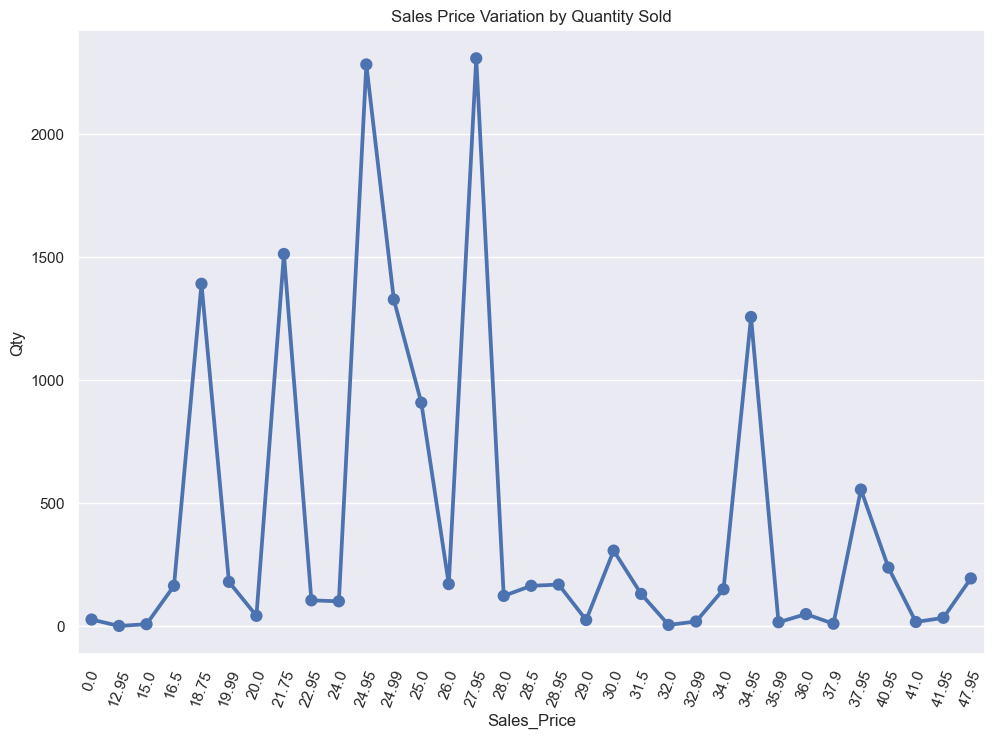

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Create the plot
sns.pointplot(data = sales, x ='Sales_Price', y ='Qty')
# Add a title, ticks
plt.title('Sales Price Variation by Quantity Sold')
plt.xticks(rotation = 70)
# Show the plot
plt.show()
#https://seaborn.pydata.org/generated/seaborn.pointplot.html


So there is some variation of prices here that comes from the business owner experimenting with prices over time.  According to him the price was initially 34.95 with a portion of those proceeds going to a PFAS study. After that the prices moved slightly between 27.95 and 24.95, with 27.95 being the current price. Some of the lower prices can be attributed to promotions or giveaways while the higher ones included donations or were in the early stages of finding a price point. As the majority of sales are close to the current listed price, I am confident there is not enough variance to negatively effect our model.
<br></br>
It should be also noted that is one of the reasons this project was started, finding an appropriate price for this company's product. I wanted to begin with this time-series project to assist with forecasting sales and inventory and hopefully end with price optimiztion after this is finished.
***
#### Sales By Grip Kit

We have inspected the sales price and made our decision on how to move forward, now lets look at sales by product.

In [47]:
# Setting the kits in order of most sold
products = df.groupby('Product_ID')['Qty'].sum().reset_index()
products = products.sort_values(by= 'Qty', ascending = False)
products

,Product_ID,Qty
2,FireWrap® Grip Kit Black,3763.0
8,FireWrap® Grip Kit Red,3313.0
3,FireWrap® Grip Kit Blue,1726.0
7,FireWrap® Grip Kit Orange,1235.0
10,FireWrap® Grip Kit Yellow,1081.0
6,FireWrap® Grip Kit Green,907.0
5,FireWrap® Grip Kit GLOW - Green ( 927 ),821.0
4,FireWrap® Grip Kit GLOW - Aqua,781.0
9,FireWrap® Grip Kit White,323.0
0,FireWrap Grip Kit - Light Blue,21.0


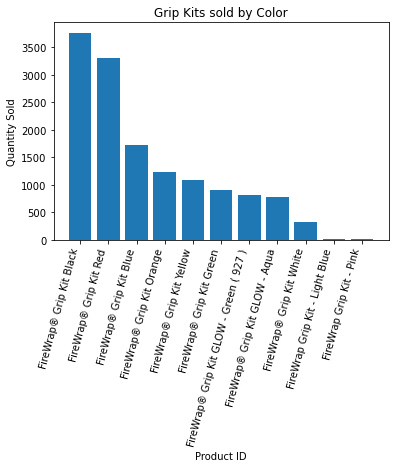

In [48]:
# Visual for sales... IN ORDER!
import matplotlib.pyplot as plt

# Create a bar chart that shows sales IN ORDER!
plt.bar(products['Product_ID'], products['Qty'])
fig = plt.figsize=(20,10)
plt.xlabel('Product ID')
plt.xticks(rotation = 75, fontsize = 10, ha= 'right')
plt.ylabel('Quantity Sold')
plt.title('Grip Kits sold by Color')

# Show the chart
plt.show()


In [323]:
# Attempting a function that shows what percentage of sales each kit is accountable for.


def grip_sales_percentage(df):
    # Group the dataframe by 'Product_ID' and sum of Qty column
    grip_sales = df.groupby('Product_ID')['Qty'].sum()
    # Get sum
    total_sales = grip_sales.sum()
    # Get the percentage of total sales for each grip kit
    grip_sales_percentage = grip_sales / total_sales * 100
    print(grip_sales_percentage)
grip_sales_percentage(df)

# https://sparkbyexamples.com/pandas/pandas-percentage-total-with-groupby/

Product_ID
FireWrap Grip Kit - Light Blue              0.150129
FireWrap Grip Kit - Pink                    0.121533
FireWrap® Grip Kit Black                   26.901630
FireWrap® Grip Kit Blue                    12.339148
FireWrap® Grip Kit GLOW - Aqua              5.583357
FireWrap® Grip Kit GLOW - Green ( 927 )     5.869317
FireWrap® Grip Kit Green                    6.484129
FireWrap® Grip Kit Orange                   8.828996
FireWrap® Grip Kit Red                     23.684587
FireWrap® Grip Kit White                    2.309122
FireWrap® Grip Kit Yellow                   7.728053
Name: Qty, dtype: float64


<br></br>
So we see black and red are most popular by far accounting for almost 50% of sales and an almost a 50% drop(23.6% to 12.3%) to blue in 3rd place. This should not be a total surprise as those are common colors of the fire industry. We are still trying to see if the colors should be kept in our models, or treat everything as one unique product. 
***
<br></br>
#### 'Datetimeindex'
In addition to the quantity of units sold the other essential factor we need to get in order is the dates. To do this we must set the dataframe index to 'DatetimeIndex' and name it 'Date'. This has several advantages, among others, easy visualization with dates on the x-axis, and the functionality to resample the data.


#### Stationarity
It is recommended to check for stationarity before setting the DataFrame to a DatetimeIndex. The reason is that you want to make sure that the time series is stationary before applying any further time series analysis. A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time.

In the next cell we will check for stationarity on the data, depending on the results will decide whether or not to remove the large orders. We can test both visually and statistically, and I plan on checking for stationarity now and on our dataframe just to ensure accuracy. 

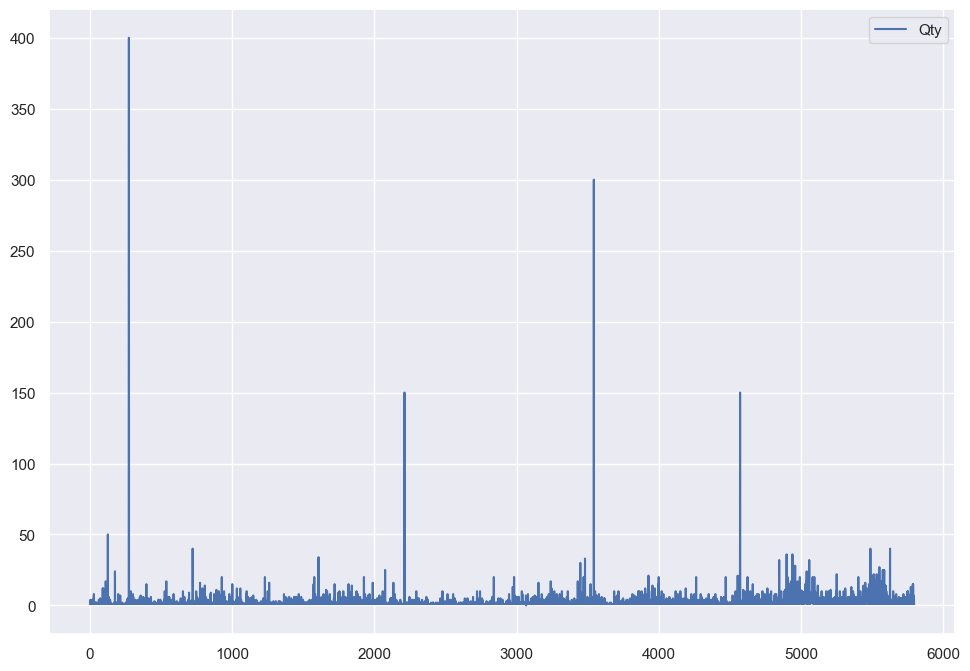

In [324]:

# Plot the time series of Qty
df.plot(y = 'Qty')
plt.show()

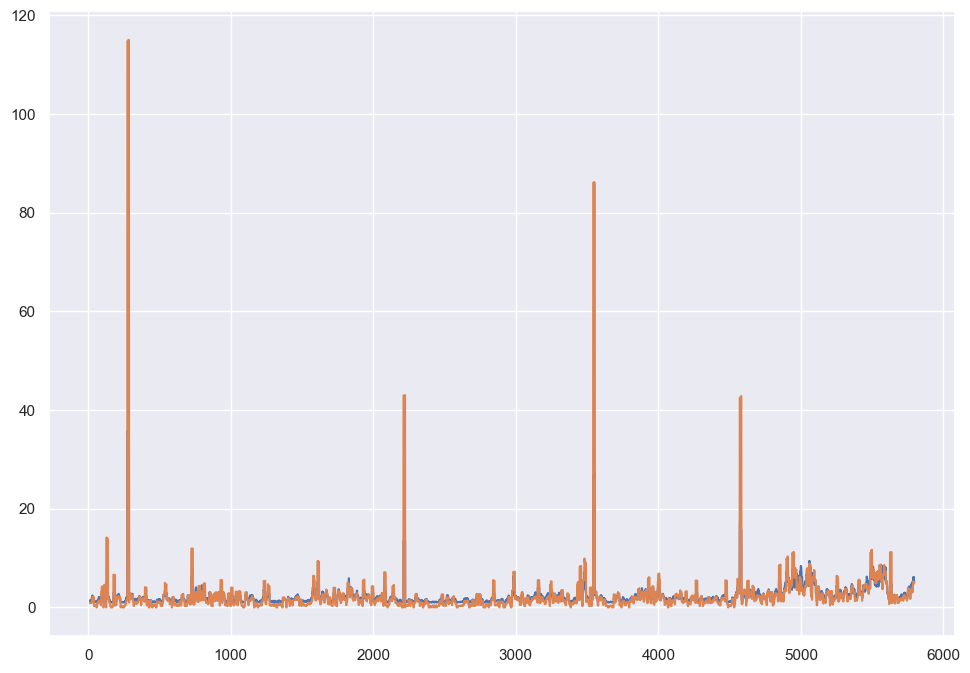

In [325]:
# Plot the rolling mean and rolling standard deviation of the 'Qty' column
df['Qty'].rolling(window=12).mean().plot()
df['Qty'].rolling(window=12).std().plot()
plt.show()


These plots have some variation, but overall seems to be stationary. The first plot is just the quanity of units sold over time. While the second visual shows the rolling mean and rolling standard deviation over time. Both have the occasional large orders, but on average they both end up coming back down and appearing stationary.
One final test would be the Adfuller test which is a statistacal test and will return a value for us to base our decision off of.

In [326]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#https://machinelearningmastery.com/time-series-data-stationary-python/

ADF Statistic: -73.642596
p-value: 0.000000


In [49]:
# An alternate test to help confirm the series is stationary when table is converted...
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

#https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide


A negative ADF statistic value, in this case -76, indicates that the time series is very likely to be stationary. This is because, in the ADF test, the null hypothesis is that there is a unit root (non-stationarity) in the time series, and a low p-value (typically less than 0.05) is used to reject the null hypothesis and conclude the time series is stationary. 

There is the occasional large that represents the single large orders, other than that the data looks sationary which is backed up by our two different AdFuller test and visuals.

##### P,D, Q
Another important aspect we will have to address soon is the parameter for the SARIMA time-series, which are denoted with 'P', 'D', and 'Q'. With the results of this ADFuller test we can assume our D paramter will be set to 0. The parameters are represented as follows:
-  p: is the order of the autoregressive term (AR), which is the number of lags used in the model. It describes the number of past values used to predict the next value.
-  d: is the order of the differencing term (I), which is used to make the time series stationary by removing trends or seasonality. It represents the number of times the data has been differenced.
-  q: is the order of the moving average term (MA), which is the error term that captures the short-term fluctuations in the data. It represents the number of past forecast errors used to predict the next value.
The 'S' in SARIMA represents the seasonality aspect of the model, usually the notation is 'SARIMA(p,d,q)(P,D,Q)m' with 'm' being a constant such as 12(months).
#https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

To find these values I will perform a GridSearch, but first a few last things with our dataframe. A key component of a time-series model is converting the table to 'DateTimeIndex' which makes the 'Date' column the index and lets us use the date's frequency information in our models. I will also create new dataframes for the grip kit colors.
***

In [50]:
# Data is stationary, changing to date time index.
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame index
df.set_index('Date', inplace=True)


In [51]:
df.head()

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-26,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-04-27,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,24.95,24.95
2018-05-14,FireWrap Grip Kit - Light Blue,Sales Receipt,1.0,34.95,34.95
2018-06-22,FireWrap Grip Kit - Light Blue,Invoice,4.0,26.00,104.00


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5740 entries, 2018-03-23 to 2022-12-27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5740 non-null   object 
 1   Transaction Type  5740 non-null   object 
 2   Qty               5740 non-null   float64
 3   Sales_Price       5740 non-null   float64
 4   Amount            5740 non-null   object 
dtypes: float64(2), object(3)
memory usage: 269.1+ KB



The index is now changed to 'Date' and it should also be noted that if we leave the frequency of the dates as inidividual days it can create a lot of noise in our models.  Therefore it should be beneficial to resample the dates to weeks or months to reduce the noise in the data and make it easier to identify patterns and trends. This will also make it easier to train the model as fewer data points will be used.
<br></br>
The dataset ranges 5 years, formatting it to months, would allow to better identify trends in sales over time. By formatting it to weeks, we can analyze the data by looking at the seasonality of the data. We can identify which months of the year the sales are highest and lowest, or identify any cyclical patterns that occur over time. This can be useful to understand patterns in the data and make predictions on future sales.

### Final DataFrames:
As we are approaching the modeling phase there is one last bit of tidying up I would like to do. Seeing how the Black, Red and Blue grip kits account for over 60% of items sold, these will be the only three that the time series model will be ran on. I will rename them to simply their color.
I plan on running 3 different SARIMA models separately, so after I rename them I will create a new DataFrame for each color.

In [53]:
# Renaming Red Black and Blue
df.replace({'FireWrap® Grip Kit Black': 'Black','FireWrap® Grip Kit Red': 'Red','FireWrap® Grip Kit Blue': 'Blue'}, inplace=True)


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5740 entries, 2018-03-23 to 2022-12-27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5740 non-null   object 
 1   Transaction Type  5740 non-null   object 
 2   Qty               5740 non-null   float64
 3   Sales_Price       5740 non-null   float64
 4   Amount            5740 non-null   object 
dtypes: float64(2), object(3)
memory usage: 429.1+ KB


In [54]:
# Checking to make sure those 3 colors are changed..
df['Product_ID'].unique()

array(['FireWrap Grip Kit - Light Blue', 'FireWrap Grip Kit - Pink',
       'Black', 'Blue', 'FireWrap® Grip Kit GLOW - Aqua',
       'FireWrap® Grip Kit GLOW - Green ( 927 )',
       'FireWrap® Grip Kit Orange', 'Red', 'FireWrap® Grip Kit Yellow',
       'FireWrap® Grip Kit Green', 'FireWrap® Grip Kit White'],
      dtype=object)

In [55]:
#Creating DF for each color that will be used...
df_black = df[df['Product_ID'] == 'Black']
df_red = df[df['Product_ID'] == 'Red']
df_blue = df[df['Product_ID'] == 'Blue']

In [56]:
# Checking new DataFrames
print(df_black.head(4))
print(df_red.head(3))
print(df_blue.head(3))

           Product_ID Transaction Type  Qty  Sales_Price    Amount
Date                                                              
2018-03-23      Black    Sales Receipt  8.0        24.95  199.60  
2018-03-23      Black    Sales Receipt  1.0        24.95   24.95  
2018-03-23      Black    Sales Receipt  1.0        24.95   24.95  
2018-03-23      Black    Sales Receipt  1.0        24.95   24.95  
           Product_ID Transaction Type  Qty  Sales_Price   Amount
Date                                                             
2018-03-23        Red    Sales Receipt  1.0        24.95  24.95  
2018-03-24        Red    Sales Receipt  1.0        24.95  24.95  
2018-03-24        Red    Sales Receipt  2.0        24.95  49.90  
           Product_ID Transaction Type  Qty  Sales_Price   Amount
Date                                                             
2018-03-24       Blue    Sales Receipt  1.0        24.95  24.95  
2018-03-24       Blue    Sales Receipt  4.0        24.95  99.80  
2018

In [80]:
# Going to check for stationarity one last time to be safe since we have new df's....
print(check_stationarity(df_black['Qty']))
print('****')
print(check_stationarity(df_blue['Qty']))
print('****')
print(check_stationarity(df_red['Qty']))

The series is stationary
None
****
The series is stationary
None
****
The series is stationary
None


****
We now have 3 dataframes for the colors that we plan on running the model on. The next few cells will have some very important steps that are necessary for optimizing accuracy in our results. First for each of the three tables I will use the 'bfill' attribute which should fill missing values with the last valid observation and helps maintain integrity of the data when going through the model. We will also resample the tables so that they are formatted to weeks instead of months which I think is better for this sized dataset.

In [57]:
# The term bfill means that we use the value before filling in missing values
df_black = df_black.fillna(df_black.bfill())

df_black

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,Black,Sales Receipt,8.0,24.95,199.60
2018-03-23,Black,Sales Receipt,1.0,24.95,24.95
2018-03-23,Black,Sales Receipt,1.0,24.95,24.95
2018-03-23,Black,Sales Receipt,1.0,24.95,24.95
2018-03-25,Black,Sales Receipt,1.0,24.95,24.95
...,...,...,...,...,...
2022-12-27,Black,Invoice,4.0,21.75,87.00
2023-01-06,Black,Invoice,6.0,21.75,130.50
2023-01-06,Black,Invoice,10.0,21.75,217.50


In [58]:
# Resampling to the data into groups by weeks starting on Saturday...
df_black_weekly = df_black.resample('W-SAT')
weekly_black_mean = df_black_weekly.mean()
weekly_black_mean

,Qty,Sales_Price
Date,,
2018-03-24,2.750000,24.950000
2018-03-31,1.000000,24.950000
2018-04-07,1.000000,24.950000
2018-04-14,1.333333,24.950000
2018-04-21,1.333333,24.950000
...,...,...
2022-12-17,2.230769,27.934615
2022-12-24,1.200000,28.650000
2022-12-31,2.230769,27.380769


In [87]:
weekly_black_mean = weekly_black_mean.fillna(weekly_black_mean.bfill())



In [82]:
df_blue = df_blue.fillna(df_blue.bfill())

df_blue

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-24,Blue,Sales Receipt,1.0,24.95,24.95
2018-03-24,Blue,Sales Receipt,4.0,24.95,99.80
2018-03-30,Blue,Sales Receipt,1.0,24.95,24.95
2018-03-31,Blue,Sales Receipt,1.0,24.95,24.95
2018-04-01,Blue,Sales Receipt,1.0,24.95,24.95
...,...,...,...,...,...
2022-12-06,Blue,Invoice,4.0,21.75,87.00
2022-12-06,Blue,Invoice,6.0,27.95,167.70
2022-12-12,Blue,Invoice,3.0,21.75,65.25


In [83]:
df_blue_weekly = df_blue.resample('W-SAT')
weekly_blue_mean = df_blue_weekly.mean()

weekly_blue_mean.head()

,Qty,Sales_Price
Date,,
2018-03-24,2.5,24.95
2018-03-31,1.0,24.95
2018-04-07,1.0,24.95
2018-04-14,1.0,24.95
2018-04-21,NaN,NaN


In [61]:
df_red = df_red.fillna(df_red.bfill())

df_red

,Product_ID,Transaction Type,Qty,Sales_Price,Amount
Date,,,,,
2018-03-23,Red,Sales Receipt,1.0,24.95,24.95
2018-03-24,Red,Sales Receipt,1.0,24.95,24.95
2018-03-24,Red,Sales Receipt,2.0,24.95,49.90
2018-03-25,Red,Sales Receipt,1.0,24.95,24.95
2018-03-26,Red,Sales Receipt,1.0,24.95,24.95
...,...,...,...,...,...
2022-12-27,Red,Invoice,1.0,21.75,21.75
2022-12-27,Red,Invoice,2.0,21.75,43.50
2022-12-27,Red,Invoice,3.0,21.75,65.25


In [62]:
df_red_weekly = df_red.resample('W-SAT')
weekly_red_mean = df_red_weekly.mean()

weekly_red_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-03-24 to 2023-01-14
Freq: W-SAT
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Qty          234 non-null    float64
 1   Sales_Price  234 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [89]:
weekly_black_mean = weekly_black_mean.fillna(weekly_black_mean.bfill())
weekly_blue_mean = weekly_blue_mean.fillna(weekly_blue_mean.bfill())
weekly_red_mean = weekly_red_mean.fillna(weekly_red_mean.bfill())





### Models:

We now have our data set up to where we can work with it, finally. This brings us to the meat and potatoes portion of the project, the modelling. To begin we need to identify our parameters which will be done via grid search, after that we will fit them to the model which will allow us to make predictions and evaluate. To give us a better idea of how the SARIMA model works, here is a brief summary:

SARIMA (Seasonal AutoRegressive Integrated Moving Average) models are a type of time series forecasting models that are used to model and predict future values based on past observations. They are an extension of the standard ARIMA (AutoRegressive Integrated Moving Average) models that include a seasonal component.

The basic structure of a SARIMA model is composed of three components:

-  AutoRegressive (AR) component: This component models the relationship between an observation and a number of lagged observations. It's represented by the parameter "p" in the SARIMA model.
 
-  Integrated (I) component: This component models the relationship between the observations and the differences between consecutive observations. It's represented by the parameter "d" in the SARIMA model.
 
-  Moving Average (MA) component: This component models the relationship between the observations and the error term (i.e. the difference between the actual observation and the prediction). It's represented by the parameter "q" in the SARIMA model.

-  Seasonal component: This component models the relationship between the observation and the lagged observations at the same time of the year. It's represented by the parameter "P", "D", and "Q" in the SARIMA model.
These parameters of the model we will try to find by performing a grid search over different combinations of parameters.

Once the parameters are chosen, the model is trained on a set of historical data, and used to make predictions about future values. The model takes into account both the trend and the seasonality of the data.
#https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide

##### Regularization Measure
The Bayesian Information Criterion (BIC) is a measure of the relative quality of statistical models. It is commonly used in the field of time series analysis to compare the quality of different models. BIC is a trade-off between the goodness of fit of the model and the complexity of the model. The lower the BIC score, the better the model fit is, and the simpler the model is.

****
#### The 3 Models
As mentioned we will run 3 time-series models, one for each of top 3 selling colors of Black, Blue and Red. The reason for doing this goes back to the original business problem. The owner does not want to be short on supplies but also does not want to take up unneeded shop space. These 3 colors we saw take up over 60% of sales therefore are the items most likely to sell out. We will begin by splitting the data into a train and test set and then use a grid search function on the test to get the parameters for the model and then begin fitting and predicting, starting with the Black grip kits.

#### First Model:

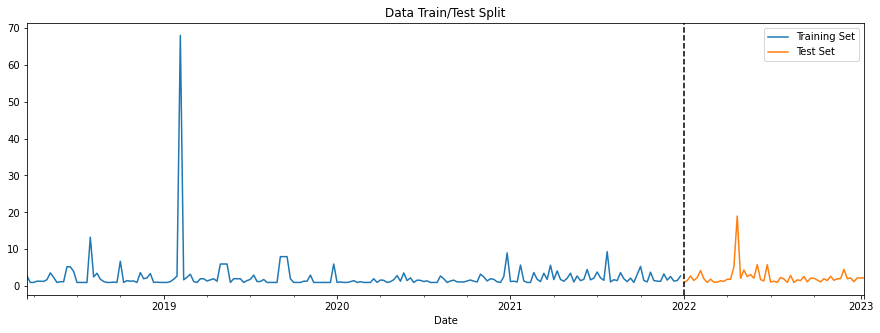

In [90]:
# split data into 80/20 test by dates..
train_black = weekly_black_mean['Qty'].loc[weekly_black_mean.index < '01-01-2022']
test_balck = weekly_black_mean['Qty'].loc[weekly_black_mean.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [184]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 52 in the 's' position as we have weekly data
pdqs = [(x[0], x[1], x[2], 51) for x in list(itertools.product(p, d, q))]

In [185]:
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W-SAT'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_black,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                )

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}51 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df
    

In [186]:
sarimax_gridsearch(train_black, pdq, pdqs, freq='W-SAT')


SARIMAX (0, 0, 0) x (0, 0, 0, 51)51 : AIC Calculated =1232.869897791128
SARIMAX (0, 0, 0) x (0, 0, 1, 51)51 : AIC Calculated =5269.011564767509
SARIMAX (0, 0, 0) x (0, 1, 0, 51)51 : AIC Calculated =938.9578691104813
SARIMAX (0, 0, 0) x (0, 1, 1, 51)51 : AIC Calculated =419.85509616667656
SARIMAX (0, 0, 0) x (1, 0, 0, 51)51 : AIC Calculated =697.2382044302012
SARIMAX (0, 0, 0) x (1, 0, 1, 51)51 : AIC Calculated =5027.980624465151
SARIMAX (0, 0, 0) x (1, 1, 0, 51)51 : AIC Calculated =423.5895114948722
SARIMAX (0, 0, 0) x (1, 1, 1, 51)51 : AIC Calculated =419.1350540073734
SARIMAX (0, 0, 1) x (0, 0, 0, 51)51 : AIC Calculated =1223.0484533598951
SARIMAX (0, 0, 1) x (0, 0, 1, 51)51 : AIC Calculated =5034.252278660364
SARIMAX (0, 0, 1) x (0, 1, 0, 51)51 : AIC Calculated =934.8728848234767
SARIMAX (0, 0, 1) x (0, 1, 1, 51)51 : AIC Calculated =415.53850306207005
SARIMAX (0, 0, 1) x (1, 0, 0, 51)51 : AIC Calculated =657.8293843344325
SARIMAX (0, 0, 1) x (1, 0, 1, 51)51 : AIC Calculated =5170.81

,pdq,pdqs,aic
11,"(0, 0, 1)","(0, 1, 1, 51)",423.136302
15,"(0, 0, 1)","(1, 1, 1, 51)",424.499944
31,"(0, 1, 1)","(1, 1, 1, 51)",424.527950
3,"(0, 0, 0)","(0, 1, 1, 51)",424.941686
35,"(1, 0, 0)","(0, 1, 1, 51)",426.011883


#### Black Grip Kit Parameter Results:
After some tinkering around I set the parameter boundaries for p,d,q to (0,2) after initially using a larger range due to it being very computationally expensive.
The best results here with a BIC score of 410.90 is :
-  (0, 0, 1)	(0,1, 1, 51)

We will now fit the model.

In [211]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL_blk = sm.tsa.statespace.SARIMAX(train_black, 
                                        order=(0,1,1), 
                                        seasonal_order=(0,1,1, 51), 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL_blk.fit()

print(output.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9747      0.100     -9.786      0.000      -1.170      -0.780
ma.S.L51      -0.3695      0.051     -7.209      0.000      -0.470      -0.269
sigma2        34.7210      2.007     17.296      0.000      30.786      38.656


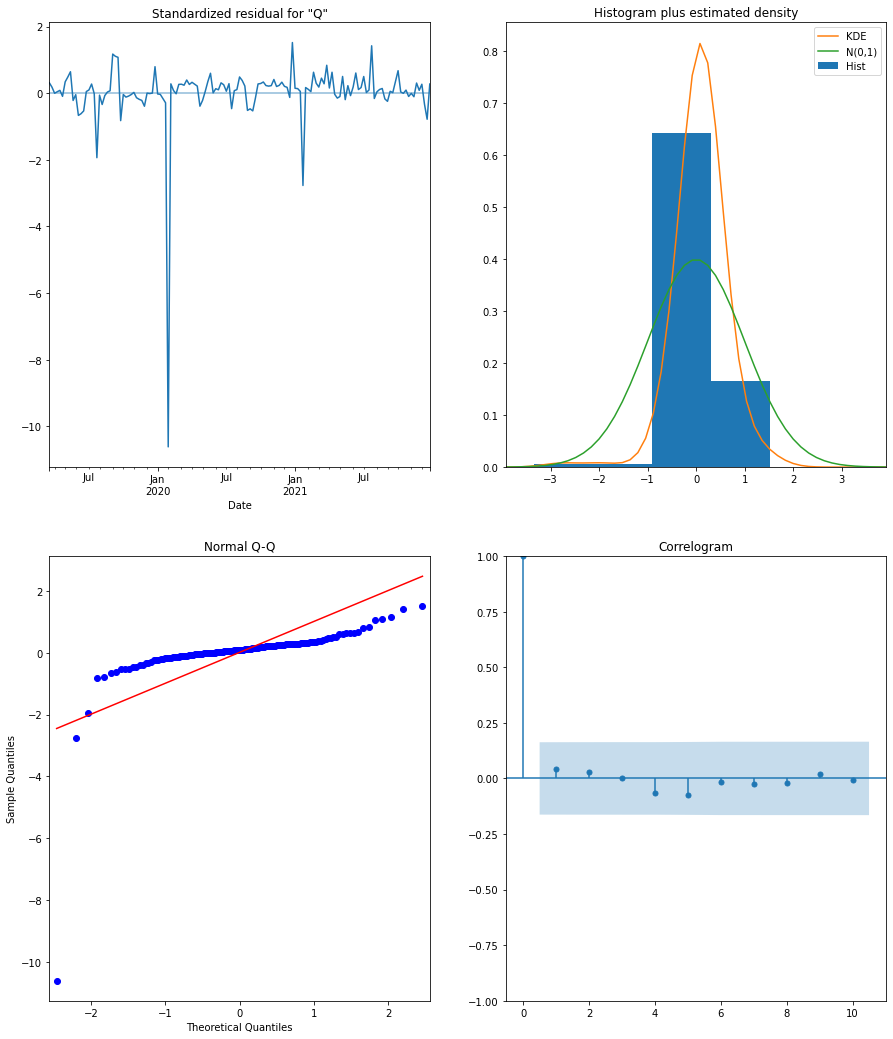

In [212]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

#### Assumptions:
So our assumptions do not look great, we saw earlier that there was an outlier in terms of a large order. Initially I wanted to keep it for the integrity of the dataset, but it may need to be removed.

### Model with Outliers Removed:

<AxesSubplot:xlabel='Date'>

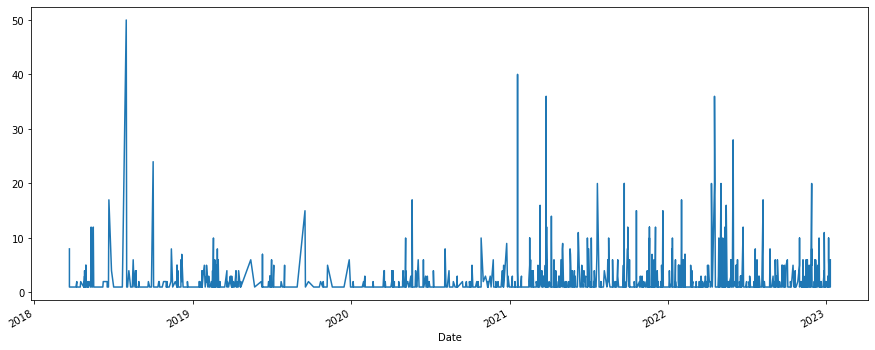

In [239]:
df_black_outlier = df_black[df_black['Qty']<=300]
df_black_outlier['Qty'].plot()

In [241]:
check_stationarity(df_black_outlier['Qty'])

The series is stationary


In [243]:
# Resampling to the data into groups by weeks starting on Saturday...
df_black_weekly_outlier = df_black_outlier.resample('W-SAT')
weekly_black_mean_outlier = df_black_weekly_outlier.mean()
weekly_black_mean_outlier

,Qty,Sales_Price
Date,,
2018-03-24,2.750000,24.950000
2018-03-31,1.000000,24.950000
2018-04-07,1.000000,24.950000
2018-04-14,1.333333,24.950000
2018-04-21,1.333333,24.950000
...,...,...
2022-12-17,2.230769,27.934615
2022-12-24,1.200000,28.650000
2022-12-31,2.230769,27.380769


In [244]:
weekly_black_mean_outlier = weekly_black_mean_outlier.fillna(weekly_black_mean_outlier.bfill())



<AxesSubplot:xlabel='Date'>

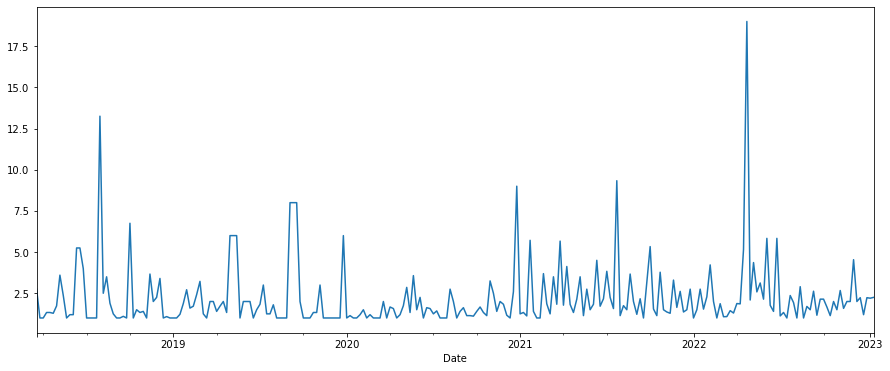

In [249]:
weekly_black_mean_outlier['Qty'].plot()

#### Back to Square One With This Model:
After making an initial attempt to run our data on the black grip kits through it looked like are assumptions were not being met and therefore could not trust the accuracy of our model. I removed the outlier from the black grip kit dataframe and resampled to weeks again. Now we will do the same process of splitting the data, finding the parameters and fitting them to make predictions.

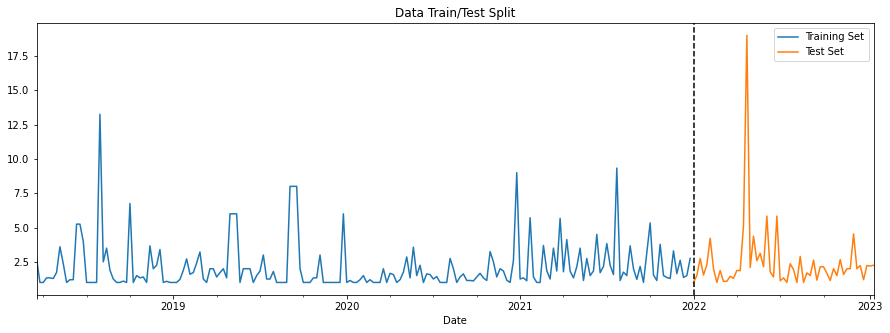

In [252]:
# split data into 80/20 test by dates..
train_black_outlier= weekly_black_mean_outlier['Qty'].loc[weekly_black_mean_outlier.index < '01-01-2022']
test_black_outlier = weekly_black_mean_outlier['Qty'].loc[weekly_black_mean_outlier.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train_black_outlier.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_black_outlier.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [255]:
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W-SAT'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by AIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best AIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_black_outlier,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                )

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}51 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df

In [256]:
sarimax_gridsearch(train_black_outlier, pdq, pdqs, freq='W-SAT')



SARIMAX (0, 0, 0) x (0, 0, 0, 51)51 : AIC Calculated =957.6107777539507
SARIMAX (0, 0, 0) x (0, 0, 1, 51)51 : AIC Calculated =6432.817655619645
SARIMAX (0, 0, 0) x (0, 1, 0, 51)51 : AIC Calculated =689.5259810326124
SARIMAX (0, 0, 0) x (0, 1, 1, 51)51 : AIC Calculated =403.4706772960273
SARIMAX (0, 0, 0) x (1, 0, 0, 51)51 : AIC Calculated =656.6361016725893
SARIMAX (0, 0, 0) x (1, 0, 1, 51)51 : AIC Calculated =4767.816409335828
SARIMAX (0, 0, 0) x (1, 1, 0, 51)51 : AIC Calculated =413.7070685333891
SARIMAX (0, 0, 0) x (1, 1, 1, 51)51 : AIC Calculated =411.93739913002474
SARIMAX (0, 0, 1) x (0, 0, 0, 51)51 : AIC Calculated =897.5432462333961
SARIMAX (0, 0, 1) x (0, 0, 1, 51)51 : AIC Calculated =5513.470619224039
SARIMAX (0, 0, 1) x (0, 1, 0, 51)51 : AIC Calculated =680.526012668293
SARIMAX (0, 0, 1) x (0, 1, 1, 51)51 : AIC Calculated =401.27845770480184
SARIMAX (0, 0, 1) x (1, 0, 0, 51)51 : AIC Calculated =639.5703649846747
SARIMAX (0, 0, 1) x (1, 0, 1, 51)51 : AIC Calculated =5225.8940

,pdq,pdqs,aic
27,"(0, 1, 1)","(0, 1, 1, 51)",398.241555
59,"(1, 1, 1)","(0, 1, 1, 51)",400.078367
11,"(0, 0, 1)","(0, 1, 1, 51)",401.278458
43,"(1, 0, 1)","(0, 1, 1, 51)",401.919391
3,"(0, 0, 0)","(0, 1, 1, 51)",403.470677


In [258]:
ARIMA_MODEL_blk_outliers = sm.tsa.statespace.SARIMAX(train_black_outlier, 
                                        order=(0,1,1), 
                                        seasonal_order=(0,1,1, 51), 
                                        enforce_invertibility=False)

# Fit the model and print results
output_1 = ARIMA_MODEL_blk_outliers.fit()

print(output_1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0404      0.039    -26.636      0.000      -1.117      -0.964
ma.S.L51      -0.8068      0.295     -2.734      0.006      -1.385      -0.228
sigma2         3.8509      1.113      3.460      0.001       1.669       6.033


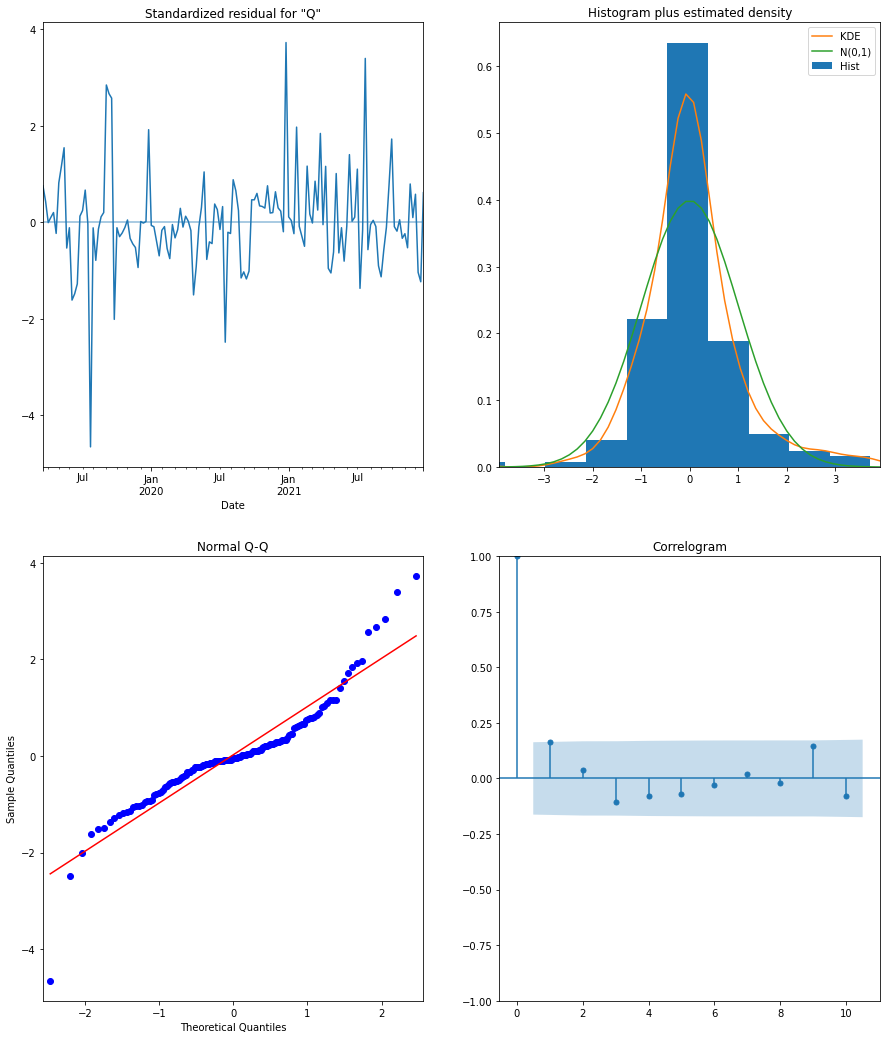

In [259]:
# Call plot_diagnostics() on the results calculated above 
output_1.plot_diagnostics(figsize=(15, 18))
plt.show()

#### Parameter Grid Search and Assumptions:
These results look far better. 
-  Summary Table:
The 'coef' column shows the moving averages for both ARIMA and SARIMA features and the p-values of them are all significant since they fall below .05. Sigma2 represents the variance, and the higher the number the more unexplained variation there is, a score of 3.8 is good.

-  Diagnostics: 
The first plot does not seem to show any trends which in conjuction with the correlogram plot show low corelation to the lags and help confirm stationarity and good fit. The histogram also shows good distribution while the QQ plot is a far improvement to our initial result.
***
### Predictions:
Now we can begin the process of making predictions for the quantities of black grip kits sold, first we will validate the model and then plot the the train and test set along with the 'One-step Ahead Forecast' and confidence intervals.

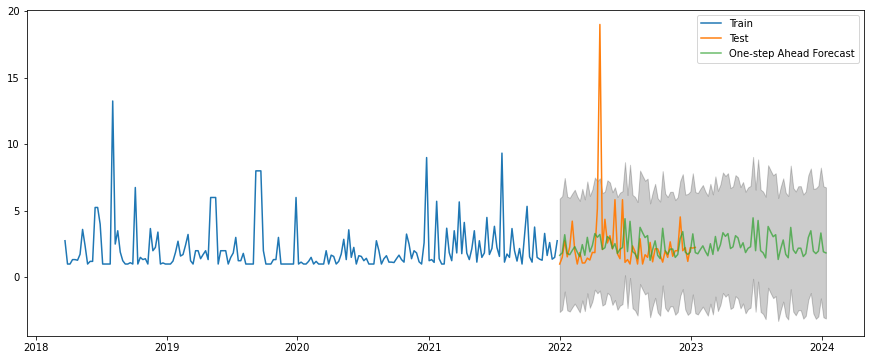

In [556]:
# Get the predicted values
pred = output_1.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=False)
pred_conf = pred.conf_int()

# Plot the actual values and predicted values
plt.plot(train_black_outlier, label='Train')
plt.plot(test_black_outlier, label='Test')
plt.plot(pred.predicted_mean, label='One-step Ahead Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()


In [411]:
pred = output_1.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=False)
pred_mean = pred.predicted_mean
print('One Step Ahead')
print('Predicted Weekly Mean of Quantity Sold')
print(pred_mean.tail())
print('*****')
pred_conf = pred.conf_int()
print('Confidence Interval:')
print(pred_conf.tail())
print('*****')
print(pred_mean.describe())

One Step Ahead
Predicted Weekly Mean of Quantity Sold
2023-12-16    1.784020
2023-12-23    1.972771
2023-12-30    3.331661
2024-01-06    1.921596
2024-01-13    1.834645
Freq: W-SAT, Name: predicted_mean, dtype: float64
*****
Confidence Interval:
            lower Qty  upper Qty
2023-12-16  -3.117128   6.685167
2023-12-23  -2.934751   6.880294
2023-12-30  -1.582227   8.245550
2024-01-06  -2.998650   6.841842
2024-01-13  -3.091951   6.761241
*****
count    107.000000
mean       2.399038
std        0.751498
min        1.278520
25%        1.838349
50%        2.152775
75%        3.009210
max        4.470700
Name: predicted_mean, dtype: float64


<br>
Looking at the orange test set line over the green forecast line we see there is some fit and some variance. The data has the occasionaly spike in units sold which will is difficult to predict, but we still see some alignment. In the cell above I printed off some of the means of predicted quantities by week.  Another way to check for accuracy is using an error metric such as MSE where the lower the score the better. Lets take a look. 

In [297]:
# Get the real and predicted values
Qty_forecasted = pred.predicted_mean
Qty_truth = test_black_outlier['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6.3


This is a good MSE score, considering lower is better but too low is usually too good to be true and may indicate overfitting which I do not think our model is doing.
****

While these results look promising we will also try another approach called 'Dynamic Forecasting' where we use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.


In [444]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=True, full_results = True)
pred_dynamic_conf = pred_dynamic.conf_int()

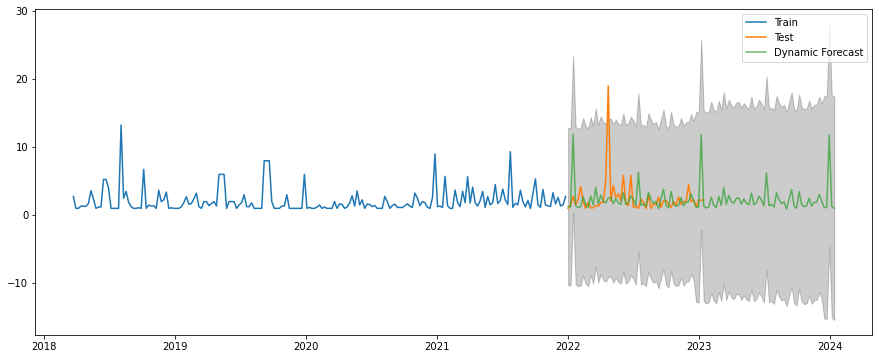

In [445]:
plt.plot(train_black_outlier, label='Train')
plt.plot(test_black_outlier, label='Test')
plt.plot(pred_dynamic.predicted_mean, label='Dynamic Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_dynamic_conf.index, pred_dynamic_conf.iloc[:, 0], pred_dynamic_conf.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()


In [409]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=True, full_results = True)
pred_dynamic_mean = pred_dynamic.predicted_mean
print('Dynamic Forecast')
print('Predicted Weekly Mean')
print(pred_dynamic_mean.tail())
pred_dynamic_conf = pred_dynamic.conf_int()
print('Confidence Intervals')
print(pred_dynamic_conf.tail())


Dynamic Forecast
Predicted Weekly Mean
2023-12-16     1.147907
2023-12-23     1.114581
2023-12-30    11.801203
2024-01-06     1.294080
2024-01-13     0.999786
Freq: W-SAT, Name: predicted_mean, dtype: float64
Confidence Intervals
            lower Qty  upper Qty
2023-12-16 -15.202980  17.498793
2023-12-23 -15.249646  17.478809
2023-12-30  -4.576355  28.178761
2024-01-06 -15.096797  17.684957
2024-01-13 -15.404400  17.403971


In [400]:
# Extract the predicted and true values of our time series
Qty_forecasted = pred_dynamic.predicted_mean
Qty_truth = test_black_outlier['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10.31


****
So our 'Dynamic' results were a little less promising than the original forecast as is shown by both the plot and error metric. The confidence interval range is also much larger than the one-step ahead forecast. Lets try one more thing, the SARIMAX get_forecast method.

In [395]:
# Get forecast 104 steps ahead in future, which in weekly format is 2 years
prediction = output_1.get_forecast(steps=104)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [401]:
Qty_forecasted = prediction.predicted_mean
Qty_truth =test_black_outlier['2022-01-01':]

mse = ((Qty_forecasted - Qty_truth)**2).mean()
print('MSE of get_forecast is {}'.format(round(mse,2)))

MSE of get_forecast is 6.3


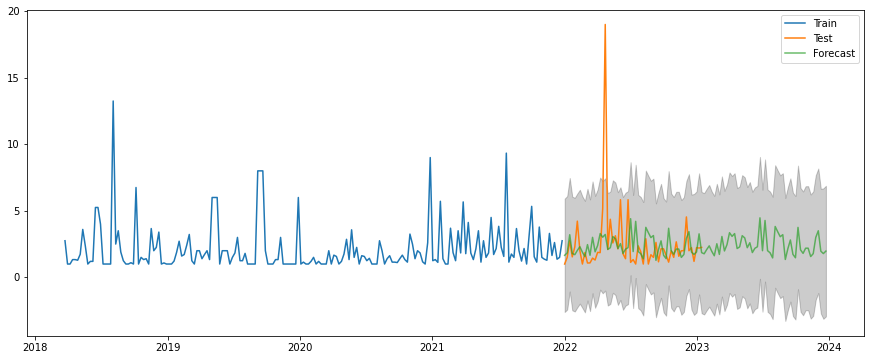

In [396]:
import matplotlib.pyplot as plt

# Get the forecasted values
pred_mean = prediction.predicted_mean

# Plot the actual values and forecasted values
plt.plot(train_black_outlier, label='Train')
plt.plot(test_black_outlier, label='Test')
plt.plot(pred_mean, label='Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()


In [555]:
# Get Forecast print off
print("Predicted Values:")
print(prediction.predicted_mean.tail())

print("Confidence Intervals:")
print(pred_conf.tail())


Predicted Values:
2023-12-16    1.784020
2023-12-23    1.972771
2023-12-30    3.331661
2024-01-06    1.921596
2024-01-13    1.834645
Freq: W-SAT, Name: predicted_mean, dtype: float64
Confidence Intervals:
            lower Qty  upper Qty
2023-12-16  -3.117128   6.685167
2023-12-23  -2.934751   6.880294
2023-12-30  -1.582227   8.245550
2024-01-06  -2.998650   6.841842
2024-01-13  -3.091951   6.761241


****

### Black Grip Kit Findings:


-  One Step Ahead
    Predicted Weekly Mean of Quantity Sold
        2023-12-16    1.784020
        2023-12-23    1.972771
        2023-12-30    3.331661
        2024-01-06    1.921596
        2024-01-13    1.834645
    Confidence Interval:
                    lower Qty  upper Qty
        2023-12-16  -3.117128   6.685167
        2023-12-23  -2.934751   6.880294
        2023-12-30  -1.582227   8.245550
        2024-01-06  -2.998650   6.841842
        2024-01-13  -3.091951   6.761241
***

-  Dynamic Forecast
    Predicted Weekly Mean
        2023-12-16     1.147907
        2023-12-23     1.114581
        2023-12-30    11.801203
        2024-01-06     1.294080
        2024-01-13     0.999786
    Confidence Intervals
                    lower Qty  upper Qty
        2023-12-16 -15.202980  17.498793
        2023-12-23 -15.249646  17.478809
        2023-12-30  -4.576355  28.178761
        2024-01-06 -15.096797  17.684957
        2024-01-13 -15.404400  17.403971
****

-  Get_forecast Predictions:
    Predicted Weekly Mean
        2023-12-16    1.784020
        2023-12-23    1.972771
        2023-12-30    3.331661
        2024-01-06    1.921596
        2024-01-13    1.834645
    Confidence Intervals
                    lower Qty  upper Qty
        2023-12-16  -3.117128   6.685167
        2023-12-23  -2.934751   6.880294
        2023-12-30  -1.582227   8.245550
        2024-01-06  -2.998650   6.841842
        2024-01-13  -3.091951   6.761241
****

The get_forecast method and one-step ahead method are near identical here and have the same MSE.

***

### Second Model:
### Blue Grip Kit Model:

We will try to follow the same steps to ensure accuracy with the data for the blue grip kits. Splitting the data, finding the parameters, fitting and predicting.But this time we will remove the outlier sales before going any further.

<AxesSubplot:xlabel='Date'>

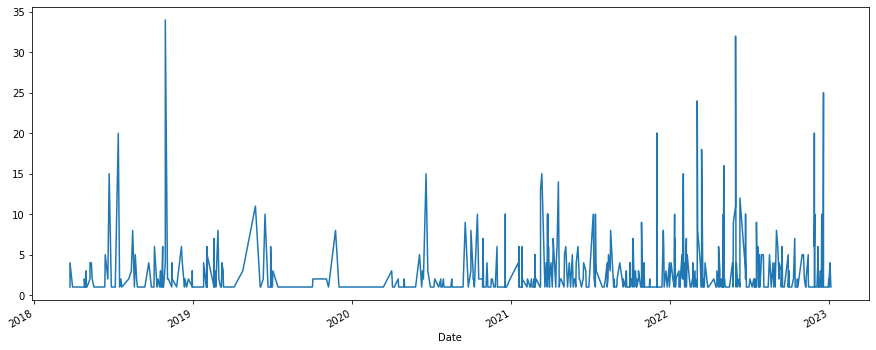

In [417]:
df_blue_outlier = df_blue[df_blue['Qty']<=300]
df_blue_outlier['Qty'].plot()

In [419]:
# Resampling to the data into groups by weeks starting on Saturday...
df_blue_weekly_outlier = df_blue_outlier.resample('W-SAT')
weekly_blue_mean_outlier = df_blue_weekly_outlier.mean()
weekly_blue_mean_outlier

,Qty,Sales_Price
Date,,
2018-03-24,2.500000,24.950000
2018-03-31,1.000000,24.950000
2018-04-07,1.000000,24.950000
2018-04-14,1.000000,24.950000
2018-04-21,NaN,NaN
...,...,...
2022-12-10,2.000000,27.705556
2022-12-17,2.714286,27.350000
2022-12-24,5.800000,28.350000


In [421]:
weekly_blue_mean_outlier = weekly_blue_mean_outlier.fillna(weekly_blue_mean_outlier.bfill())

weekly_blue_mean_outlier

,Qty,Sales_Price
Date,,
2018-03-24,2.500000,24.950000
2018-03-31,1.000000,24.950000
2018-04-07,1.000000,24.950000
2018-04-14,1.000000,24.950000
2018-04-21,1.142857,24.950000
...,...,...
2022-12-10,2.000000,27.705556
2022-12-17,2.714286,27.350000
2022-12-24,5.800000,28.350000


In [511]:
check_stationarity(weekly_blue_mean_outlier['Qty'])

The series is stationary


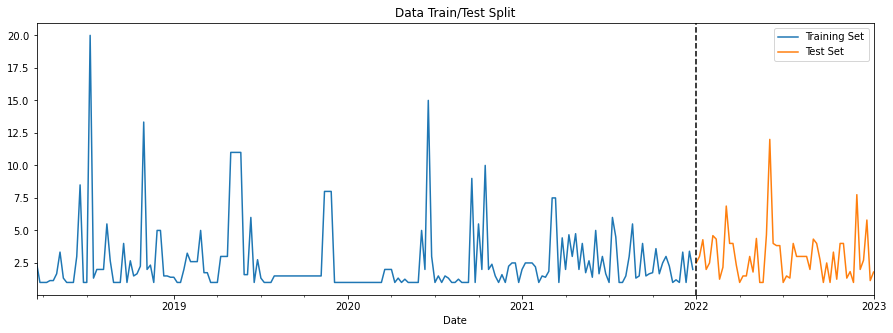

In [509]:
# split data into 80/20 test by dates..
train_blue = weekly_blue_mean_outlier['Qty'].loc[weekly_blue_mean_outlier['Qty'].index < '01-01-2022']
test_blue = weekly_blue_mean_outlier['Qty'].loc[weekly_blue_mean_outlier['Qty'].index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train_blue.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_blue.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [512]:
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W-SAT'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by AIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best AIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_blue,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                )

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}51 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df

In [513]:
sarimax_gridsearch(train_blue, pdq, pdqs, maxiter=50, freq='W-SAT')

SARIMAX (0, 0, 0) x (0, 0, 0, 51)51 : AIC Calculated =1076.9502043305497
SARIMAX (0, 0, 0) x (0, 0, 1, 51)51 : AIC Calculated =5157.018643774245
SARIMAX (0, 0, 0) x (0, 1, 0, 51)51 : AIC Calculated =815.6018933564097
SARIMAX (0, 0, 0) x (0, 1, 1, 51)51 : AIC Calculated =472.5037177915236
SARIMAX (0, 0, 0) x (1, 0, 0, 51)51 : AIC Calculated =758.043314569356
SARIMAX (0, 0, 0) x (1, 0, 1, 51)51 : AIC Calculated =6566.192300551418
SARIMAX (0, 0, 0) x (1, 1, 0, 51)51 : AIC Calculated =477.03410083731706
SARIMAX (0, 0, 0) x (1, 1, 1, 51)51 : AIC Calculated =474.88409885645575
SARIMAX (0, 0, 1) x (0, 0, 0, 51)51 : AIC Calculated =1029.960030107297
SARIMAX (0, 0, 1) x (0, 0, 1, 51)51 : AIC Calculated =6037.325338822133
SARIMAX (0, 0, 1) x (0, 1, 0, 51)51 : AIC Calculated =801.073306513406
SARIMAX (0, 0, 1) x (0, 1, 1, 51)51 : AIC Calculated =469.1299875362192
SARIMAX (0, 0, 1) x (1, 0, 0, 51)51 : AIC Calculated =731.8681304492229
SARIMAX (0, 0, 1) x (1, 0, 1, 51)51 : AIC Calculated =6026.0927

,pdq,pdqs,aic
27,"(0, 1, 1)","(0, 1, 1, 51)",468.224056
59,"(1, 1, 1)","(0, 1, 1, 51)",468.921367
11,"(0, 0, 1)","(0, 1, 1, 51)",469.129988
43,"(1, 0, 1)","(0, 1, 1, 51)",469.495097
31,"(0, 1, 1)","(1, 1, 1, 51)",471.931051


In [514]:
ARIMA_MODEL_blue_outliers = sm.tsa.statespace.SARIMAX(train_blue, 
                                        order=(1,1,1), 
                                        seasonal_order=(0,1,1, 51), 
                                        enforce_invertibility=False)

# Fit the model and print results
output_2 = ARIMA_MODEL_blk_outliers.fit()

print(output_2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0404      0.039    -26.636      0.000      -1.117      -0.964
ma.S.L51      -0.8068      0.295     -2.734      0.006      -1.385      -0.228
sigma2         3.8509      1.113      3.460      0.001       1.669       6.033


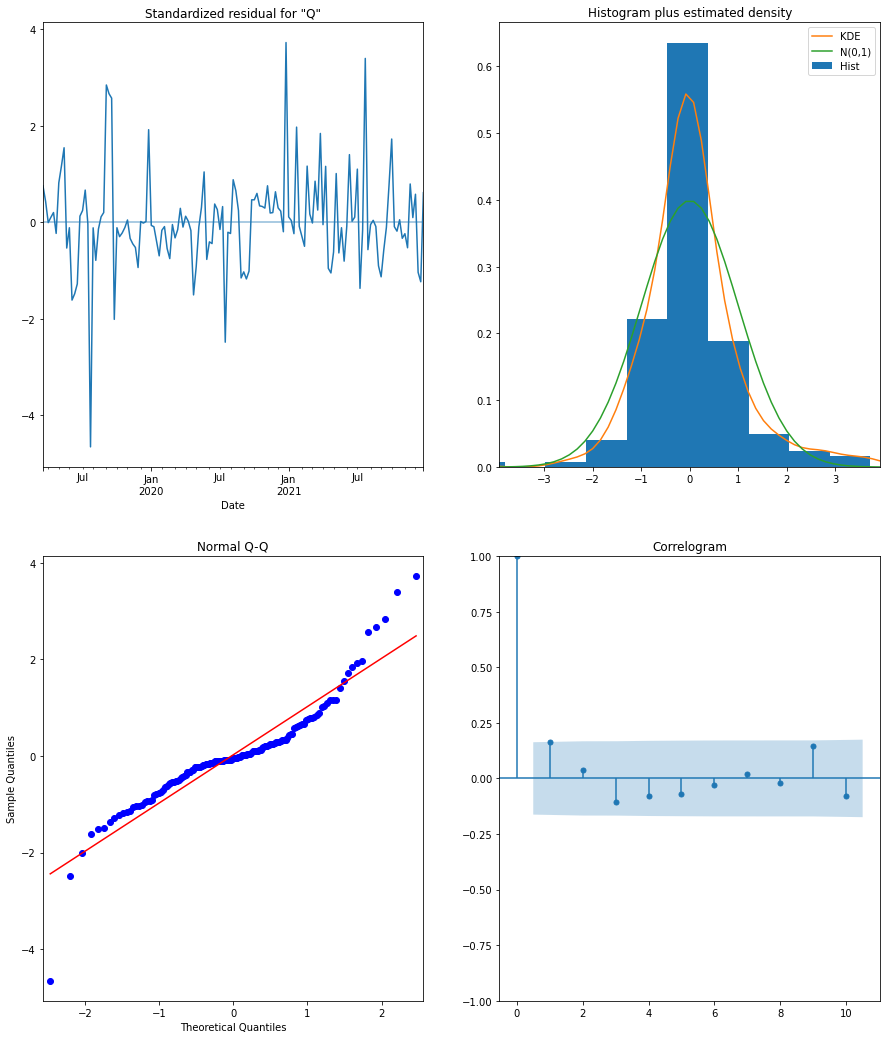

In [515]:
# Call plot_diagnostics() on the results calculated above 
output_2.plot_diagnostics(figsize=(15, 18))
plt.show()

<br></br>
So far we have a similar situation in terms of parameters, but I went with the second best score just to experiment a little, our coeffecients and p-values still look good too.
We will get predictions with one-step ahead, dynamic and get_forecast methods, just as with the previous model.

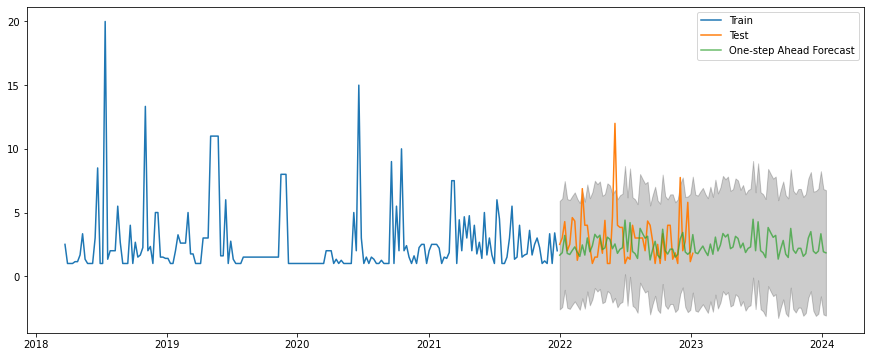

In [516]:
# Get the predicted values via one_step ahead method...
pred2 = output_2.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=False)
pred_conf2 = pred2.conf_int()

# Plot the actual values and predicted values
plt.plot(train_blue, label='Train')
plt.plot(test_blue, label='Test')
plt.plot(pred2.predicted_mean, label='One-step Ahead Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_conf2.index, pred_conf2.iloc[:, 0], pred_conf2.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [517]:
pred2 = output_2.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=False)
pred_mean2 = pred2.predicted_mean
print('Blue')
print('One Step Ahead')
print('Predicted Weekly Mean of Quantity Sold')
print(pred_mean2.tail())
print('*****')
pred_conf2 = pred2.conf_int()
print('Confidence Interval:')
print(pred_conf2.tail())
print('*****')
print(pred_mean2.describe())

Blue
One Step Ahead
Predicted Weekly Mean of Quantity Sold
2023-12-16    1.784020
2023-12-23    1.972771
2023-12-30    3.331661
2024-01-06    1.921596
2024-01-13    1.834645
Freq: W-SAT, Name: predicted_mean, dtype: float64
*****
Confidence Interval:
            lower Qty  upper Qty
2023-12-16  -3.117128   6.685167
2023-12-23  -2.934751   6.880294
2023-12-30  -1.582227   8.245550
2024-01-06  -2.998650   6.841842
2024-01-13  -3.091951   6.761241
*****
count    107.000000
mean       2.399038
std        0.751498
min        1.278520
25%        1.838349
50%        2.152775
75%        3.009210
max        4.470700
Name: predicted_mean, dtype: float64


In [518]:
# Get the real and predicted values
Qty_forecasted = pred2.predicted_mean
Qty_truth = test_blue['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4.95


<br></br>
For the one-step ahead forecast on the blue grip kits, the plot looks promising and the print out of the predictions look very similar to the previous model but the MSE score of 4.95 is the best score yet.
Now we will try the dynamic forecasting.

In [519]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic2 = output_2.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=True, full_results = True)
pred_dynamic_conf2 = pred_dynamic2.conf_int()

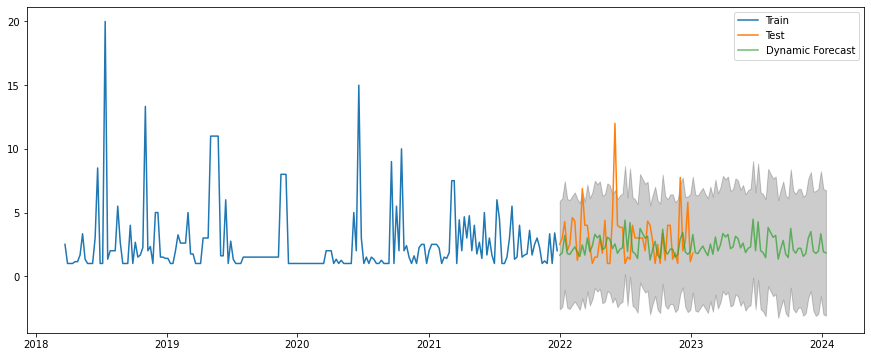

In [520]:
plt.plot(train_blue, label='Train')
plt.plot(test_blue, label='Test')
plt.plot(pred_dynamic2.predicted_mean, label='Dynamic Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_dynamic_conf2.index, pred_dynamic_conf2.iloc[:, 0], pred_dynamic_conf2.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()



In [521]:
pred_dynamic2 = output_2.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=True, full_results = True)
pred_dynamic_mean2 = pred_dynamic2.predicted_mean
print('Dynamic Forecast')
print('Predicted Weekly Mean')
print(pred_dynamic_mean2.tail())
pred_dynamic_conf2 = pred_dynamic2.conf_int()
print('Confidence Intervals')
print(pred_dynamic_conf2.tail())




Dynamic Forecast
Predicted Weekly Mean
2023-12-16    1.784020
2023-12-23    1.972771
2023-12-30    3.331661
2024-01-06    1.921596
2024-01-13    1.834645
Freq: W-SAT, Name: predicted_mean, dtype: float64
Confidence Intervals
            lower Qty  upper Qty
2023-12-16  -3.117128   6.685167
2023-12-23  -2.934751   6.880294
2023-12-30  -1.582227   8.245550
2024-01-06  -2.998650   6.841842
2024-01-13  -3.091951   6.761241


In [522]:
# Get the real and predicted values
Qty_forecasted = pred_dynamic2.predicted_mean
Qty_truth = test_blue['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4.95


<br></br>
Results are looking very similar still, will run the 'get_forecast' method.
****

In [523]:
# Get forecast 104 steps ahead in future, which in weekly format is 2 years
prediction2 = output_2.get_forecast(steps=104)

# Get confidence intervals of forecasts
pred_conf2 = prediction2.conf_int()

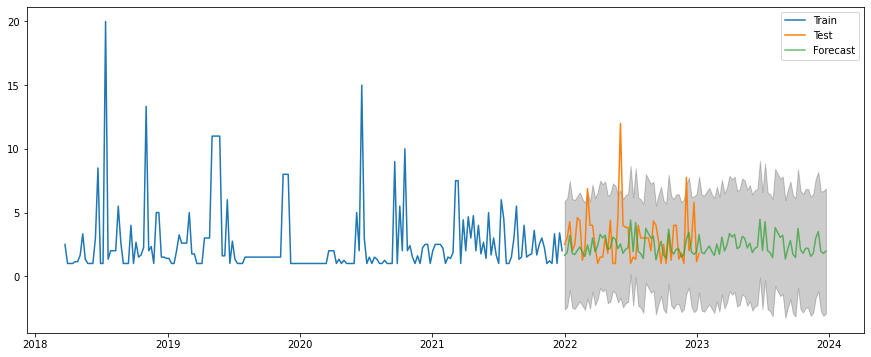

In [524]:
# Plot the get_forecast results....
# Get the forecasted values
pred_mean2 = prediction2.predicted_mean

# Plot the actual values and forecasted values
plt.plot(train_blue, label='Train')
plt.plot(test_blue, label='Test')
plt.plot(pred_mean2, label='Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_conf2.index, pred_conf2.iloc[:, 0], pred_conf2.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()


In [553]:
print("Predicted Values:")
print(prediction2.predicted_mean.tail())

print("Confidence Intervals:")
print(pred_conf2.tail())



Predicted Values:
2023-11-25    2.996778
2023-12-02    3.498694
2023-12-09    1.965922
2023-12-16    1.784020
2023-12-23    1.972771
Freq: W-SAT, Name: predicted_mean, dtype: float64
Confidence Intervals:
            lower Qty  upper Qty
2023-11-25  -1.677234   7.670791
2023-12-02  -1.179590   8.176978
2023-12-09  -2.716630   6.648474
2023-12-16  -3.117128   6.685167
2023-12-23  -2.934751   6.880294


In [454]:
Qty_forecasted = prediction2.predicted_mean
Qty_truth =test_blue['2022-01-01':]

mse = ((Qty_forecasted - Qty_truth)**2).mean()
print('MSE of get_forecast is {}'.format(round(mse,2)))

MSE of get_forecast is 4.95


### Blue Grip Kit Results:


-   One Step Ahead
        Predicted Weekly Mean of Quantity Sold
        2023-12-16    1.784020
        2023-12-23    1.972771
        2023-12-30    3.331661
        2024-01-06    1.921596
        2024-01-13    1.834645
-  Confidence Interval:
                    lower Qty  upper Qty
        2023-12-16  -3.117128   6.685167
        2023-12-23  -2.934751   6.880294
        2023-12-30  -1.582227   8.245550
        2024-01-06  -2.998650   6.841842
        2024-01-13  -3.091951   6.761241
        
****
-  Dynamic Forecast
    Predicted Weekly Mean
        2023-12-16    1.784020
        2023-12-23    1.972771
        2023-12-30    3.331661
        2024-01-06    1.921596
        2024-01-13    1.834645
    Confidence Intervals
                lower Qty  upper Qty
        2023-12-16  -3.117128   6.685167
        2023-12-23  -2.934751   6.880294
        2023-12-30  -1.582227   8.245550
        2024-01-06  -2.998650   6.841842
        2024-01-13  -3.091951   6.761241
***
-  Get_Forecast:
    Predicted Values:
        2023-11-25    2.996778
        2023-12-02    3.498694
        2023-12-09    1.965922
        2023-12-16    1.784020
        2023-12-23    1.972771
    Confidence Intervals:
                lower Qty  upper Qty
        2023-11-25  -1.677234   7.670791
        2023-12-02  -1.179590   8.176978
        2023-12-09  -2.716630   6.648474
        2023-12-16  -3.117128   6.685167
        2023-12-23  -2.934751   6.880294
****

Very similar results but the get_forecast has slightly tighter confidence intervals.

****
### Third Model:
### Red Grip Kit Model:

Same steps with the data for the red grip kits:

<AxesSubplot:xlabel='Date'>

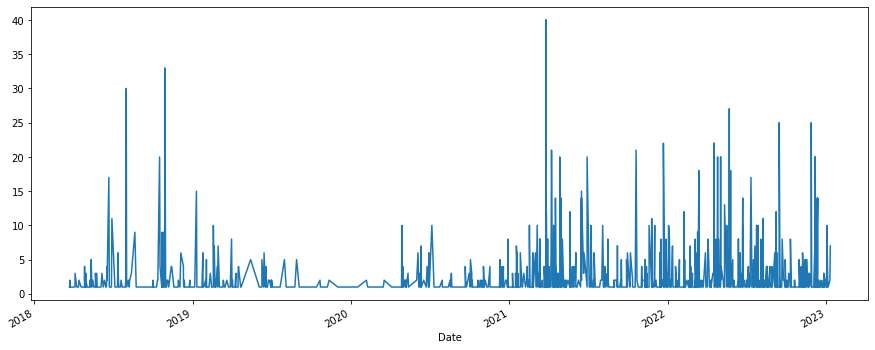

In [505]:
# remove outliers
df_red_outlier = df_red[df_red['Qty']<=150]
df_red_outlier['Qty'].plot()

In [506]:
#resample
df_red_weekly_outlier = df_red_outlier.resample('W-SAT')
weekly_red_mean_outlier = df_red_weekly_outlier.mean()
weekly_red_mean_outlier

,Qty,Sales_Price
Date,,
2018-03-24,1.333333,24.950000
2018-03-31,1.000000,24.950000
2018-04-07,1.666667,24.950000
2018-04-14,1.333333,24.950000
2018-04-21,1.000000,24.950000
...,...,...
2022-12-17,3.533333,26.563333
2022-12-24,1.200000,28.350000
2022-12-31,1.333333,26.630000


In [507]:
# filling in
weekly_red_mean_outlier = weekly_red_mean_outlier.fillna(weekly_red_mean_outlier.bfill())

weekly_red_mean_outlier

,Qty,Sales_Price
Date,,
2018-03-24,1.333333,24.950000
2018-03-31,1.000000,24.950000
2018-04-07,1.666667,24.950000
2018-04-14,1.333333,24.950000
2018-04-21,1.000000,24.950000
...,...,...
2022-12-17,3.533333,26.563333
2022-12-24,1.200000,28.350000
2022-12-31,1.333333,26.630000


In [525]:
check_stationarity(weekly_red_mean_outlier['Qty'])

The series is stationary


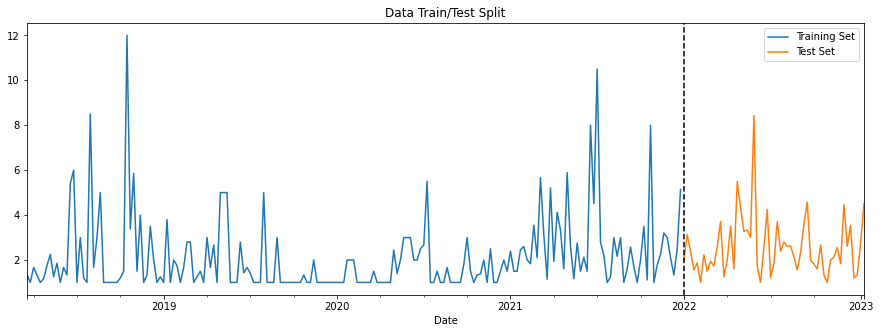

In [526]:
# split data into 80/20 test by dates..
train_red = weekly_red_mean_outlier['Qty'].loc[weekly_red_mean_outlier['Qty'].index < '01-01-2022']
test_red = weekly_red_mean_outlier['Qty'].loc[weekly_red_mean_outlier['Qty'].index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train_red.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_red.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [527]:
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W-SAT'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by AIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best AIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_red,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                )

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}51 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
            
    # Find the parameters with minimal AIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df

In [528]:
sarimax_gridsearch(train_red, pdq, pdqs, maxiter=50, freq='W-SAT')

SARIMAX (0, 0, 0) x (0, 0, 0, 51)51 : AIC Calculated =950.7581966551638
SARIMAX (0, 0, 0) x (0, 0, 1, 51)51 : AIC Calculated =4538.215028035799
SARIMAX (0, 0, 0) x (0, 1, 0, 51)51 : AIC Calculated =640.364541826305
SARIMAX (0, 0, 0) x (0, 1, 1, 51)51 : AIC Calculated =387.7259779381033
SARIMAX (0, 0, 0) x (1, 0, 0, 51)51 : AIC Calculated =622.5809958994164
SARIMAX (0, 0, 0) x (1, 0, 1, 51)51 : AIC Calculated =5951.155232999396
SARIMAX (0, 0, 0) x (1, 1, 0, 51)51 : AIC Calculated =391.3174030232628
SARIMAX (0, 0, 0) x (1, 1, 1, 51)51 : AIC Calculated =390.00778430505244
SARIMAX (0, 0, 1) x (0, 0, 0, 51)51 : AIC Calculated =893.3938782173337
SARIMAX (0, 0, 1) x (0, 0, 1, 51)51 : AIC Calculated =6913.1457622925445
SARIMAX (0, 0, 1) x (0, 1, 0, 51)51 : AIC Calculated =634.2662281203458
SARIMAX (0, 0, 1) x (0, 1, 1, 51)51 : AIC Calculated =383.21450912222207
SARIMAX (0, 0, 1) x (1, 0, 0, 51)51 : AIC Calculated =610.7802965503157
SARIMAX (0, 0, 1) x (1, 0, 1, 51)51 : AIC Calculated =6473.325

,pdq,pdqs,aic
27,"(0, 1, 1)","(0, 1, 1, 51)",369.251103
31,"(0, 1, 1)","(1, 1, 1, 51)",370.726208
59,"(1, 1, 1)","(0, 1, 1, 51)",371.087667
63,"(1, 1, 1)","(1, 1, 1, 51)",372.696077
43,"(1, 0, 1)","(0, 1, 1, 51)",374.268362


In [529]:
# fitting the data
ARIMA_MODEL_red_outliers = sm.tsa.statespace.SARIMAX(train_red, 
                                        order=(0,1,1), 
                                        seasonal_order=(0,1,1, 51), 
                                        enforce_invertibility=False)

# Fit the model and print results
output_3 = ARIMA_MODEL_red_outliers.fit()

print(output_3.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9078      0.037    -24.744      0.000      -0.980      -0.836
ma.S.L51      -0.2476      0.108     -2.285      0.022      -0.460      -0.035
sigma2         4.0379      0.297     13.588      0.000       3.455       4.620


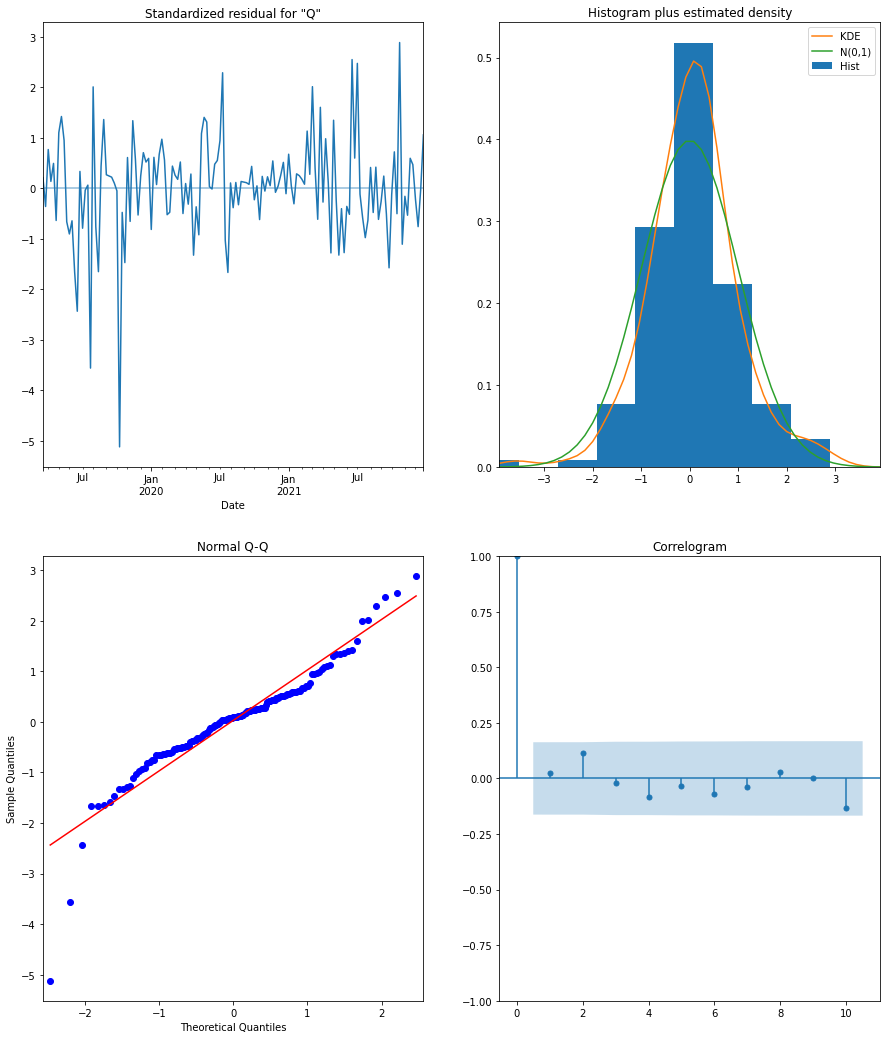

In [530]:
# Call plot_diagnostics() on the results calculated above 
output_3.plot_diagnostics(figsize=(15, 18))
plt.show()

<br></br>
Parameters have fit well and our assumption plots look acceptable.
We will now the predictions as before through 'one-step ahead', 'dynamic', and 'get_forecast'. After producing these we will print the and plot the predictions and check our error metric.

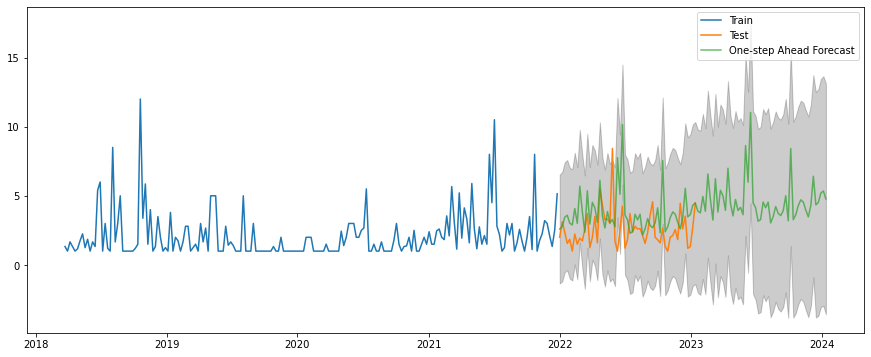

In [552]:
# Get the predicted values via one_step ahead method...
pred3 = output_3.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=False)
pred_conf3 = pred3.conf_int()

# Plot the actual values and predicted values
plt.plot(train_red, label='Train')
plt.plot(test_red, label='Test')
plt.plot(pred3.predicted_mean, label='One-step Ahead Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_conf3.index, pred_conf3.iloc[:, 0], pred_conf3.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [536]:
print(' Predicted Quantity Values')
print(pred3.predicted_mean.tail())
print('Predicted Confidence Intervals')
print(pred_conf3.tail())

 Predicted Quantity Values
2023-12-16    4.346932
2023-12-23    4.521725
2023-12-30    5.202805
2024-01-06    5.345485
2024-01-13    4.769612
Freq: W-SAT, Name: predicted_mean, dtype: float64
Predicted Confidence Intervals
            lower Qty  upper Qty
2023-12-16  -3.800596  12.494460
2023-12-23  -3.676426  12.719877
2023-12-30  -3.045659  13.451270
2024-01-06  -2.952988  13.643957
2024-01-13  -3.578569  13.117792


In [532]:
# Get the real and predicted values
Qty_forecasted = pred3.predicted_mean
Qty_truth = test_red['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4.51


In [537]:
# Dynamic:

# Get dynamic predictions with confidence intervals as above 
pred_dynamic3 = output_3.get_prediction(start=pd.to_datetime('01-01-2022'), end=pd.to_datetime('01-11-2024'), dynamic=True, full_results = True)
pred_dynamic_conf3 = pred_dynamic3.conf_int()

In [538]:
print(' Predicted Quantity Values')
print(pred_dynamic3.predicted_mean.tail())
print('Predicted Confidence Intervals')
print(pred_dynamic_conf3.tail())

 Predicted Quantity Values
2023-12-16    4.346932
2023-12-23    4.521725
2023-12-30    5.202805
2024-01-06    5.345485
2024-01-13    4.769612
Freq: W-SAT, Name: predicted_mean, dtype: float64
Predicted Confidence Intervals
            lower Qty  upper Qty
2023-12-16  -3.800596  12.494460
2023-12-23  -3.676426  12.719877
2023-12-30  -3.045659  13.451270
2024-01-06  -2.952988  13.643957
2024-01-13  -3.578569  13.117792


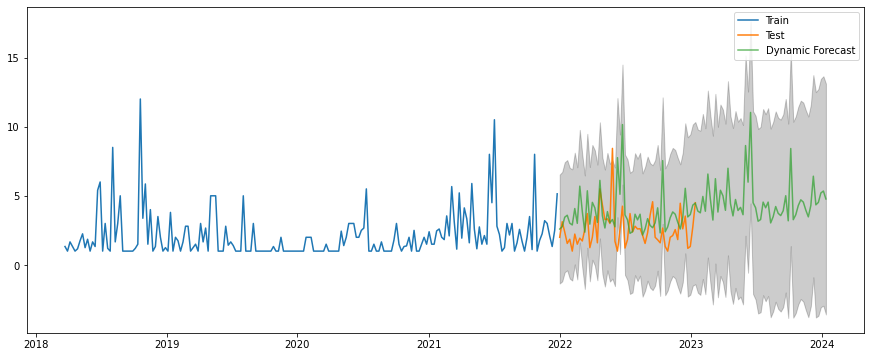

In [539]:
# Dynamic: 
plt.plot(train_red, label='Train')
plt.plot(test_red, label='Test')
plt.plot(pred_dynamic3.predicted_mean, label='Dynamic Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_dynamic_conf3.index, pred_dynamic_conf3.iloc[:, 0], pred_dynamic_conf3.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()



In [540]:
# Get the real and predicted values
Qty_forecasted = pred_dynamic3.predicted_mean
Qty_truth = test_blue['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6.38


***
So far for the red grip kits the predictions look similar between one-step and dynamic but the MSE is strong for the one-step predictions. We will check the get_forecast method now.

In [547]:
# Get forecast 104 steps ahead in future, which in weekly format is 2 years
prediction3 = output_3.get_forecast(steps=104)

# Get confidence intervals of forecasts
pred_conf3 = prediction3.conf_int()

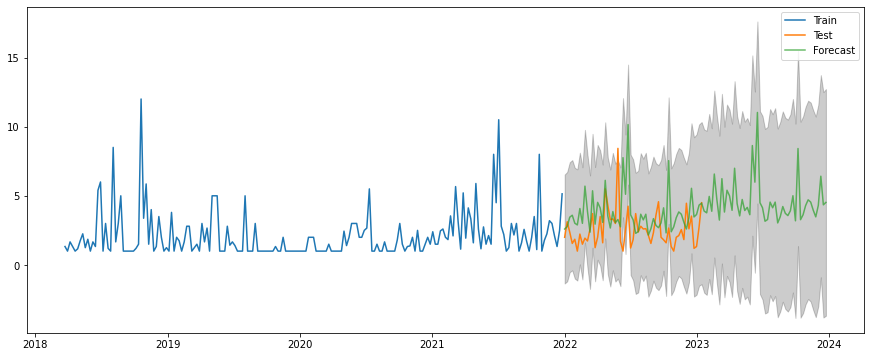

In [548]:
# Plot the get_forecast results....
# Get the forecasted values
pred_mean3 = prediction3.predicted_mean

# Plot the actual values and forecasted values
plt.plot(train_red, label='Train')
plt.plot(test_red, label='Test')
plt.plot(pred_mean3, label='Forecast', alpha=.7)

# Shade the area between the confidence intervals
plt.fill_between(pred_conf3.index, pred_conf3.iloc[:, 0], pred_conf3.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [550]:
print("Predicted Values:")
print(prediction3.predicted_mean.tail())

print("Confidence Intervals:")
print(pred_conf3.tail())


Predicted Values:
2023-11-25    3.476089
2023-12-02    4.300575
2023-12-09    6.417023
2023-12-16    4.346932
2023-12-23    4.521725
Freq: W-SAT, Name: predicted_mean, dtype: float64
Confidence Intervals:
            lower Qty  upper Qty
2023-11-25  -3.777278  10.729457
2023-12-02  -2.980654  11.581805
2023-12-09  -0.891962  13.726008
2023-12-16  -3.800596  12.494460
2023-12-23  -3.676426  12.719877


In [551]:
# Get the real and predicted values
Qty_forecasted = prediction3.predicted_mean
Qty_truth = test_red['2022-01-01':]

# Compute the mean square error
mse = ((Qty_forecasted - Qty_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4.51


In [562]:
print(prediction.predicted_mean.tail(50))

2023-02-04    2.367202
2023-02-11    1.953122
2023-02-18    1.621106
2023-02-25    2.523740
2023-03-04    1.723247
2023-03-11    3.070174
2023-03-18    1.982547
2023-03-25    2.456742
2023-04-01    3.353200
2023-04-08    3.078591
2023-04-15    3.286646
2023-04-22    2.164709
2023-04-29    2.290468
2023-05-06    3.129965
2023-05-13    2.961318
2023-05-20    2.225559
2023-05-27    2.599131
2023-06-03    1.861470
2023-06-10    2.182489
2023-06-17    2.298702
2023-06-24    4.470700
2023-07-01    2.002034
2023-07-08    4.272881
2023-07-15    2.003699
2023-07-22    1.842053
2023-07-29    1.459304
2023-08-05    3.821388
2023-08-12    3.421304
2023-08-19    3.052151
2023-08-26    3.206144
2023-09-02    1.343693
2023-09-09    2.152775
2023-09-16    2.807238
2023-09-23    1.724659
2023-09-30    1.470834
2023-10-07    3.751950
2023-10-14    2.065123
2023-10-21    1.801308
2023-10-28    2.188778
2023-11-04    2.189909
2023-11-11    1.561534
2023-11-18    1.780391
2023-11-25    2.996778
2023-12-02 

### Red Grip Kit Results:

<em>One-Step Ahead results:</em>
 -   Predicted Quantity Values:
        2023-12-16    4.346932
        2023-12-23    4.521725
        2023-12-30    5.202805
        2024-01-06    5.345485
        2024-01-13    4.769612
-  Predicted Confidence Intervals:
                    lower Qty  upper Qty
        2023-12-16  -3.800596  12.494460
        2023-12-23  -3.676426  12.719877
        2023-12-30  -3.045659  13.451270
        2024-01-06  -2.952988  13.643957
        2024-01-13  -3.578569  13.117792
***********
<em>Dynamic</em>
  -   Predicted Quantity Values
        2023-12-16    4.346932
        2023-12-23    4.521725
        2023-12-30    5.202805
        2024-01-06    5.345485
        2024-01-13    4.769612
  -   Predicted Confidence Intervals
                    lower Qty  upper Qty
        2023-12-16  -3.800596  12.494460
        2023-12-23  -3.676426  12.719877
        2023-12-30  -3.045659  13.451270
        2024-01-06  -2.952988  13.643957
        2024-01-13  -3.578569  13.117792
*****
<em> Get_Forecast</em>
  -  Predicted Values:
        2023-11-25    3.476089
        2023-12-02    4.300575
        2023-12-09    6.417023
        2023-12-16    4.346932
        2023-12-23    4.521725
  -  Confidence Intervals:
                    lower Qty  upper Qty
        2023-11-25  -3.777278  10.729457
        2023-12-02  -2.980654  11.581805
        2023-12-09  -0.891962  13.726008
        2023-12-16  -3.800596  12.494460
        2023-12-23  -3.676426  12.719877
****
The one-step and dynamic results were near identical, while the get_forecast method had better confidence intervals and an MSE of 4.51.

### Evaluations:

For the black grip kits the model split 80/20 and had the (p,d,q)(P,D,Q,s)parameters formatted to (0, 1, 1)	(0, 1, 1, 51) with an AIC score of 398.241555.
The most sucessful forecast from this model was with using the get_forecast method that had predicted confidence intervals that hovered around a range of 9 which was lower than the other 2 forecasts, and had a respectable MSE of 6.31.

For the blue grip kits using the same methodology the parameters were formatted to (1, 1, 1)	(0, 1, 1, 51) with an AIC  of 468.92136, this was actually the second best parameter score but I did not want to use the same parameters just to vary the results. The get_forecast again had the best confidence interval and a strong MSE of 4.

For the red grip kit the parameters were again set to (0, 1, 1)	(0, 1, 1, 51) with an AIC of369.251103, I tried to vary these parameters but almost every other combination resulted in high p-values and violations of assumptions. As with the other models, the get_forecast was the most successful with a much smaller range in terms of confidence intervals an a MSE of 4.51.

These results can be interpreted as follows for the red grip kits, based on our model the average quanity of units that will be sold this coming December will be as follows:

-  First Week of December:   4.300575
-  Second Week    6.417023
-  Third Week    4.346932
-  Fourth Week   4.521725



However, it's important to keep in mind that forecasting is not always accurate and unexpected events can happen, so it's important to have a buffer inventory to handle unexpected demand or supply chain disruptions. The confidence interval can be used to help with these buffers. Additionally, other factors such as pricing, marketing, and competition can affect the demand for the product, so it's important to consider these factors in your inventory management strategy. 

Below will show the average number of units that will be sold each week for the next year according to our predictions:

In [569]:
# Black Grip Kits

# Get forecast 52 steps ahead in future, which in weekly format is 1 year
prediction = output_1.get_forecast(steps=52)

# Get the predicted values
pred_mean = prediction.predicted_mean

# Calculate the mean of predicted values
mean_prediction = pred_mean.mean()

# Print the mean of predictions
print("The average quantity prediction per week for the next year is: ", mean_prediction)


The average quantity prediction per week for the next year is:  2.377730540886904


In [571]:
# Red Grip Kits

# Get forecast 52 steps ahead in future, which in weekly format is 1 year
prediction2 = output_2.get_forecast(steps=52)

# Get the predicted values
pred_mean2 = prediction2.predicted_mean

# Calculate the mean of predicted values
mean_prediction2 = pred_mean2.mean()

# Print the mean of predictions
print("The average quantity prediction for the next year is: ", mean_prediction2)


The average quantity prediction for the next year is:  2.3650596983399303


In [572]:
# Blue Grip Kits:
# Get forecast 52 steps ahead in future, which in weekly format is 1 year
prediction3 = output_3.get_forecast(steps=52)

# Get the predicted values
pred_mean3 = prediction3.predicted_mean

# Calculate the mean of predicted values
mean_prediction3 = pred_mean3.mean()

# Print the mean of predictions
print("The average quantity prediction for the next year is: ", mean_prediction3)


The average quantity prediction for the next year is:  3.707200237295367
